# Import Libraries

In [1]:
#-----------------------------------------------------------------------------------------------------------------
# import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from datetime import date
from sklearn.feature_selection import f_regression, mutual_info_classif
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow_addons.optimizers import AdamW
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
#from grid_search_utils import plot_grid_search, table_grid_search
#-----------------------------------------------------------------------------------------------------------------

# Read Dataset

## Train Dataset

In [2]:
# read train dataset
train_df = pd.read_csv("./fraudTrain.csv")

In [3]:
# show random 10 sample of our dataset
train_df.sample(10)

Unnamed: 0 trans_date_trans_time            cc_num  \
600288       600288   2019-09-12 04:12:34  4450831335606294   
912492       912492   2019-12-29 13:24:08  4450831335606294   
436484       436484   2019-07-14 07:42:55  3598215285024754   
880508       880508   2019-12-22 10:49:26  2720830304681674   
972110       972110   2020-01-28 06:17:33   213163860545705   
1227177     1227177   2020-05-27 04:12:40  3598304579370089   
22400         22400   2019-01-14 08:41:52  3521417320836166   
273386       273386   2019-05-15 09:52:50  3583793405872580   
113355       113355   2019-03-05 05:02:27  3560725013359375   
1082529     1082529   2020-03-25 12:15:41  4254074738931278   

                                            merchant       category     amt  \
600288                              fraud_Barton Inc    grocery_pos   63.20   
912492                              fraud_Torp-Lemke       misc_pos  140.86   
436484                       fraud_Emmerich-Luettgen    grocery_net   80.55   
880508             fraud_Schoen, Kuphal and Nitzsche    grocery_pos  187.82   
972110              fraud_Stehr, Jewess and Schimmel       misc_net  112.97   
1227177                               fraud_Cole PLC    grocery_pos   58.86   
22400                        fraud_McDermott-Weimann    grocery_pos  178.44   
273386   fraud_Christiansen, Goyette and Schamberger  gas_transport   48.12   
113355            fraud_Kutch, Hermiston and Farrell  gas_transport   65.58   
1082529                        fraud_Champlin-Casper           home  170.39   

           first     last gender                          street  ...  \
600288     Donna    Davis      F              6760 Donovan Lakes  ...   
912492     Donna    Davis      F              6760 Donovan Lakes  ...   
436484    Ashley    Lopez      F            9333 Valentine Point  ...   
880508   Melissa  Aguilar      F  21326 Taylor Squares Suite 708  ...   
972110      Mark    Tyler      M  82201 Bradley Radial Suite 703  ...   
1227177  Vincent  Flowers      M              0189 Emily Prairie  ...   
22400     Angela   Hodges      F                  08236 Kim Hill  ...   
273386      Beth  Lambert      F   6447 Johnson Estates Apt. 986  ...   
113355    Brooke    Smith      F       63542 Luna Brook Apt. 012  ...   
1082529     Gary     Hall      M              69085 Short Shores  ...   

             lat      long  city_pop                        job         dob  \
600288   34.5906  -95.3800      1760  Occupational psychologist  1972-01-20   
912492   34.5906  -95.3800      1760  Occupational psychologist  1972-01-20   
436484   40.6729  -73.5365     34496          Librarian, public  1970-10-21   
880508   36.5220  -87.3490    151785                Pathologist  1974-03-28   
972110   33.1410  -82.5150       741  Claims inspector/assessor  1986-04-28   
1227177  37.6395  -97.1714    409656           Heritage manager  1985-12-27   
22400    39.8490  -86.2720    910148                Firefighter  1975-11-30   
273386   34.8470  -98.9836       551     Amenity horticulturist  1970-09-27   
113355   31.8599 -102.7413        23             Cytogeneticist  1969-09-15   
1082529  42.0737  -78.0594       239             Radio producer  1956-05-02   

                                trans_num   unix_time  merch_lat  merch_long  \
600288   3a1972b8624291b9542bf94001538ae0  1347423154  34.203250  -95.460206   
912492   00549fd104277b84c5ddcc9f5075e545  1356787448  33.595357  -94.724311   
436484   923a71abfe16bcb16926605005b6fa50  1342251775  40.464187  -72.620758   
880508   912e7d0f85723e557c4717a8baf30ea0  1356173366  37.401681  -87.147156   
972110   c7ea4de01b5d524eda5a3360950c5876  1359353853  33.329879  -82.687571   
1227177  671b7b2f49bf563da20da66887e5ebc0  1369627960  38.515125  -96.200952   
22400    518190d0e078c48261cf3f05b4dc6981  1326530512  39.387049  -87.009957   
273386   3ca5c84fe5837de3d0643c8174cd3907  1337075570  34.944228  -98.019859   
113355   484d45d48e3f362c9f495c366deab5a1  13309237

## Test Dataset

In [4]:
# read test dataset
test_df = pd.read_csv("./fraudTest.csv")

In [5]:
# show 10 random sample of test dataset
test_df.sample(10)

Unnamed: 0 trans_date_trans_time            cc_num  \
93144        93144   2020-07-23 17:13:15   377234009633447   
298184      298184   2020-10-11 22:37:25       60416207185   
347063      347063   2020-11-02 08:07:40  3529597810116815   
337432      337432   2020-10-28 14:48:47  4334230547694630   
450361      450361   2020-12-08 11:38:25  3560725013359375   
262770      262770   2020-09-26 14:19:21    30290551782700   
316230      316230   2020-10-19 15:32:02  4509922033272157   
32238        32238   2020-07-02 04:44:52  4364010865167176   
174175      174175   2020-08-21 13:45:08  3513618443244549   
75809        75809   2020-07-17 20:12:14   376445266762684   

                                  merchant        category     amt    first  \
93144                   fraud_Johns-Hoeger   entertainment    1.54  Theresa   
298184                     fraud_Boyer PLC    shopping_net  702.87     Mary   
347063        fraud_Zieme, Bode and Dooley   gas_transport   38.77   Pamela   
337432            fraud_Waters-Cruickshank  health_fitness   78.86    Scott   
450361               fraud_Dooley-Thompson        misc_net    6.02   Brooke   
262770                fraud_Erdman-Schaden   personal_care   39.95     John   
316230             fraud_Powlowski-Weimann     food_dining    7.90   Monica   
32238              fraud_Emmerich-Luettgen     grocery_net   17.44     Gary   
174175  fraud_Bahringer, Osinski and Block     food_dining   58.55    Amber   
75809                    fraud_Kulas Group  health_fitness   27.69   Rachel   

             last gender                         street  ...      lat  \
93144   Blackwell      F         43576 Kristina Islands  ...  39.3716   
298184       Diaz      F               9886 Anita Drive  ...  43.0048   
347063     Curtis      F  8969 Fuentes Station Apt. 291  ...  40.4679   
337432     Martin      M             7483 Navarro Flats  ...  43.0172   
450361      Smith      F      63542 Luna Brook Apt. 012  ...  31.8599   
262770     Clarke      M           27909 Peter Motorway  ...  36.8020   
316230       West      F    22084 Smith Roads Suite 776  ...  43.2893   
32238    Martinez      M            03512 Jackson Ports  ...  39.5483   
174175      Perez      F                 954 Reyes Ways  ...  43.7588   
75809        Lowe      F             372 Jeffrey Course  ...  41.1558   

            long  city_pop                          job         dob  \
93144   -77.8229      1925            Systems developer  1966-02-14   
298184 -108.8964      1645  Information systems manager  1986-02-17   
347063  -77.8967      1334                Archaeologist  1986-12-17   
337432 -111.0292       471    Education officer, museum  1967-08-02   
450361 -102.7413        23               Cytogeneticist  1969-09-15   
262770  -87.8286     13422         Commissioning editor  1961-09-03   
316230  -97.1904       811                 Neurosurgeon  1972-03-28   
32238  -119.7957    276896                 Immunologist  1997-03-12   
174175  -97.8712       355            Financial adviser  1955-06-26   
75809  -101.1360      1789             Insurance broker  1982-02-11   

                               trans_num   unix_time  merch_lat  merch_long  \
93144   fc51dcd968158c97d228df96458909a0  1374599595  39.223293  -78.456175   
298184  db789e83487b7aa6a0bea741e536420a  1381531045  43.177821 -108.967821   
347063  48e8d48e73416e3ab3e4bd50c59d09b4  1383379660  39.870825  -77.574590   
337432  615872fea01f1850a6c550d3dc95180d  1382971727  43.630833 -111.068173   
450361  6fe4b9e43d19fb7b491af2c7beaf06c9  1386502705  32.756940 -103.371516   
262770  464f2b7b0094e8b96913bd7b3a4aeb34  1380205161  36.523254  -88.647308   
316230  16461f4dd185a93d6200cb1776a8a7aa  1382196722  42.672475  -96.292164   
32238   56c7021893313198ac217e0d1241571e  1372740292  39.272425 -119.803467   
174175  8b13d9f98f830fa85543295e28feb5af  1377092708  43.544793  -96.874775   
75809   559e0eee80d29beef912fe9183b7b2f3  1374091934  41.349483 -101.123425   


# Feature Engineering and EDA

In [6]:
# show some information about the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Check null values

In [7]:
# check null values
train_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Check Data Imbalanced Or Not .. ?

<AxesSubplot:ylabel='is_fraud'>

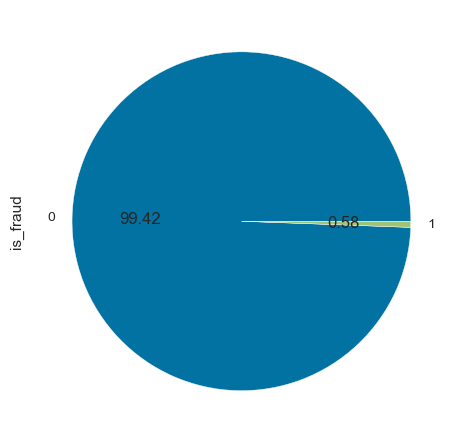

In [8]:
# check imbalance of data
train_df.is_fraud.value_counts().plot.pie(autopct='%.2f')

## Handling Object Columns

### trans_date_trans_time

In [9]:
# train
# Change date to be date type
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
# Create column week number
train_df['week_number'] = train_df['trans_date_trans_time'].dt.dayofweek
assert train_df['week_number'].max() == 6
# Create column month number
train_df['month_number'] = train_df['trans_date_trans_time'].dt.month
assert train_df['month_number'].max() == 12
# Create column year
train_df['year'] = train_df['trans_date_trans_time'].dt.year

In [10]:
# test
# Change date to be date type
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
# Create column week number
test_df['week_number'] = test_df['trans_date_trans_time'].dt.dayofweek
assert test_df['week_number'].max() == 6
# Create column month number
test_df['month_number'] = test_df['trans_date_trans_time'].dt.month
assert test_df['month_number'].max() == 12
# Create column year
test_df['year'] = test_df['trans_date_trans_time'].dt.year

In [11]:
# Drop this column
train_df.drop(columns=['trans_date_trans_time'], axis=1, inplace=True)
test_df.drop(columns=['trans_date_trans_time'], axis=1, inplace=True)

### merchant

In [12]:
# value counts
train_df.merchant.value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

In [13]:
# use label encoder to handle this column
label_encoder_merchant = LabelEncoder()
train_df.merchant = label_encoder_merchant.fit_transform(train_df.merchant)
test_df.merchant = label_encoder_merchant.transform(test_df.merchant)

### category

In [14]:
# value counts
train_df.category.value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [15]:
# show unique values in this column
np.unique(train_df.category, return_counts=True)

(array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
        'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
        'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
        'travel'], dtype=object),
 array([ 94014,  91461, 131659,  45452, 123638,  85879, 123115, 113035,
         63287,  79655,  90758,  97543, 116672,  40507], dtype=int64))

<AxesSubplot:title={'center':'Number of frauds by category'}, xlabel='category', ylabel='is_fraud'>

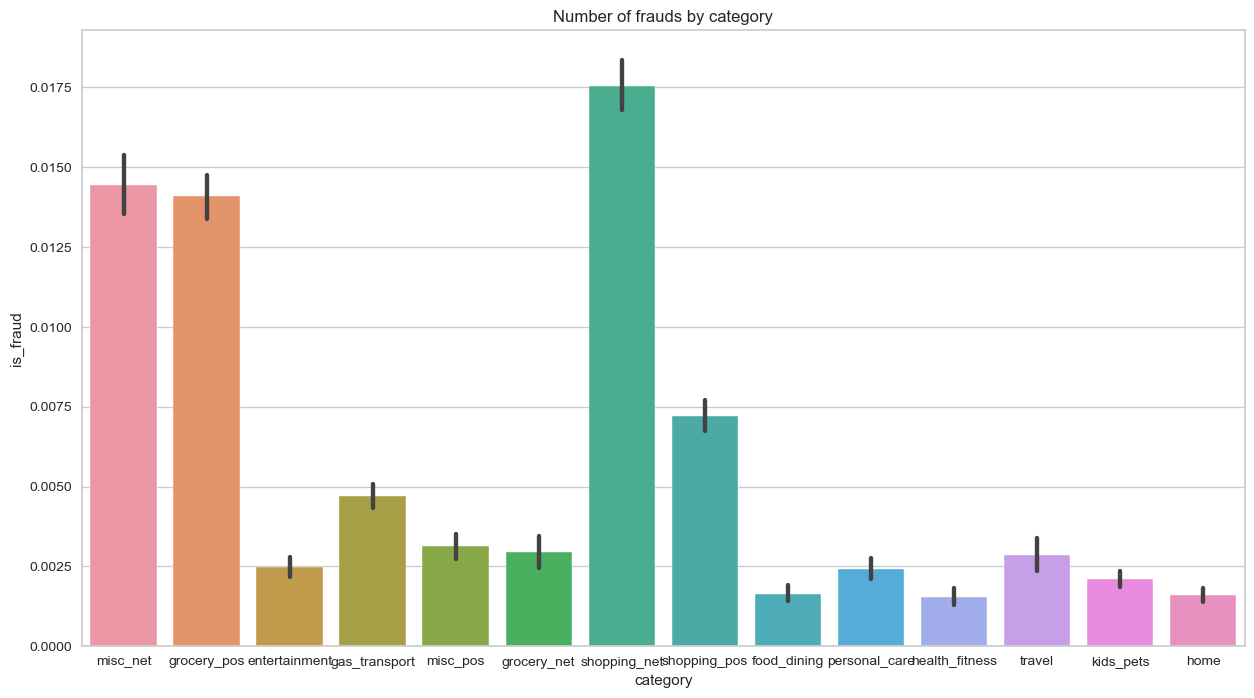

In [16]:
# Category
plt.figure(figsize=(15,8))
plt.title('Number of frauds by category')
sns.barplot(x="category", y='is_fraud' ,data=train_df)

In [17]:
# use one hot encoder for train
train_category_onehot = pd.get_dummies(train_df.category, prefix='category')
train_df = train_df.join(train_category_onehot)

In [18]:
# use one hot encoder for test
test_category_onehot = pd.get_dummies(test_df.category, prefix='category')
test_df = test_df.join(test_category_onehot)

In [19]:
# drop category
train_df.drop(columns=['category'], axis=1, inplace=True)
test_df.drop(columns=['category'], axis=1, inplace=True)

### first and last

In [20]:
# drop first and last columns because they make the model baies to names not focus on other features
train_df.drop(columns=['first', 'last'], axis=1, inplace=True)
test_df.drop(columns=['first', 'last'], axis=1, inplace=True)

### gender

In [21]:
# value counts
train_df['gender'].value_counts()

F    709863
M    586812
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

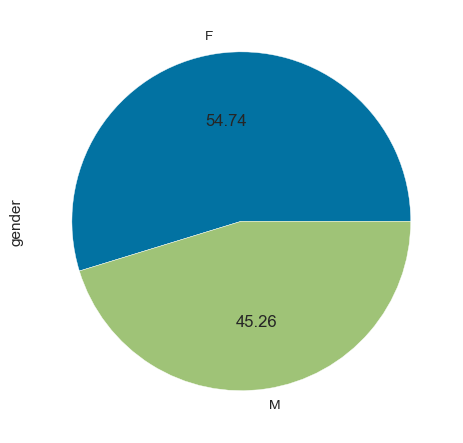

In [22]:
train_df.gender.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:xlabel='gender', ylabel='is_fraud'>

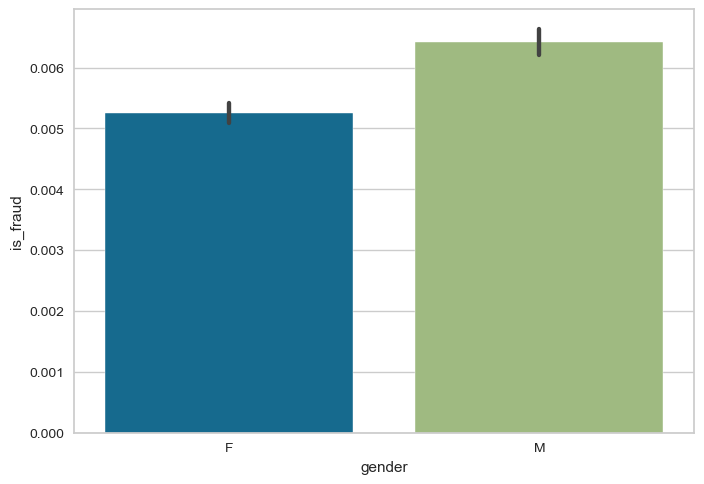

In [23]:
# visualize gender with fraud
sns.barplot(x="gender", y='is_fraud', data=train_df)

In [24]:
# use one hot encoder
train_df.gender = pd.get_dummies(train_df.gender, drop_first=True)
test_df.gender = pd.get_dummies(test_df.gender, drop_first=True)

### street, city, state and zip

In [25]:
# drop these columns because they will make the model bias to streat or city or state
train_df.drop(columns=['street', 'city', 'state', 'zip'], axis=1, inplace=True)
test_df.drop(columns=['street', 'city', 'state', 'zip'], axis=1, inplace=True)

### dob

In [26]:
# function to calculate edge
def calculate_age(row):
    today = date.today()
    return today.year - row['dob'].year - ((today.month, today.day) < (row['dob'].month, row['dob'].day))

In [27]:
# Train data
train_df['dob'] = pd.to_datetime(train_df['dob'])
train_df['age'] = train_df['dob']
train_df['age'] = train_df.apply (lambda row: calculate_age(row), axis=1)

In [28]:
# Test data
test_df['dob'] = pd.to_datetime(test_df['dob'])
test_df['age'] = test_df['dob']
test_df['age'] = test_df.apply (lambda row: calculate_age(row), axis=1)

In [29]:
# drop dop
train_df.drop(columns=['dob'], axis=1, inplace=True)
test_df.drop(columns=['dob'], axis=1, inplace=True)

### Unnamed: 0, cc_num and trans_num

In [30]:
# drop un-named column
train_df.drop(columns=['Unnamed: 0', 'cc_num', 'trans_num'], axis=1, inplace=True)
test_df.drop(columns=['Unnamed: 0', 'cc_num', 'trans_num'], axis=1, inplace=True)

### job

In [31]:
# value counts
train_df['job'].value_counts()

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64

In [32]:
# len of unique valuse in train_df
len(np.unique(train_df.job))

494

In [33]:
# len of unique valuse in test_df
len(np.unique(test_df.job))

478

In [34]:
# get values in test_df not in train_df
for i in tqdm(np.unique(test_df.job)):
    if i not in np.unique(train_df.job):
        print(i)

 35%|████████████████████████████                                                    | 168/478 [02:05<03:50,  1.35it/s]

Engineer, water


 64%|███████████████████████████████████████████████████▌                            | 308/478 [03:49<02:06,  1.35it/s]

Operational investment banker


 86%|████████████████████████████████████████████████████████████████████▉           | 412/478 [05:06<00:48,  1.35it/s]

Software engineer


100%|████████████████████████████████████████████████████████████████████████████████| 478/478 [05:55<00:00,  1.34it/s]


In [35]:
# use hash to convert job column from string to int
def hash_job(job):
    new_job = []
    for i in tqdm(job):
        val = 0
        for j in range(len(i)):
            val += ord(i[j])
        new_job.append(val)
    return new_job

In [36]:
# convert train_df.job column using hash function
train_df.job = hash_job(train_df.job)

100%|████████████████████████████████████████████████████████████████████| 1296675/1296675 [00:02<00:00, 437827.34it/s]


In [37]:
# convert test_df.job column using hash function
test_df.job = hash_job(test_df.job)

100%|██████████████████████████████████████████████████████████████████████| 555719/555719 [00:01<00:00, 444473.38it/s]


## visualize data after handling columns

array([[<AxesSubplot:title={'center':'merchant'}>,
        <AxesSubplot:title={'center':'amt'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'city_pop'}>,
        <AxesSubplot:title={'center':'job'}>,
        <AxesSubplot:title={'center':'unix_time'}>,
        <AxesSubplot:title={'center':'merch_lat'}>,
        <AxesSubplot:title={'center':'merch_long'}>],
       [<AxesSubplot:title={'center':'is_fraud'}>,
        <AxesSubplot:title={'center':'week_number'}>,
        <AxesSubplot:title={'center':'month_number'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'category_entertainment'}>],
       [<AxesSubplot:title={'center':'category_food_dining'}>,
        <AxesSubplot:title={'center':'category_gas_transport'}>,
        <AxesSubplot:title={'center':'category_grocery_net'}>,
        <AxesSubplot:title={'center':'cat

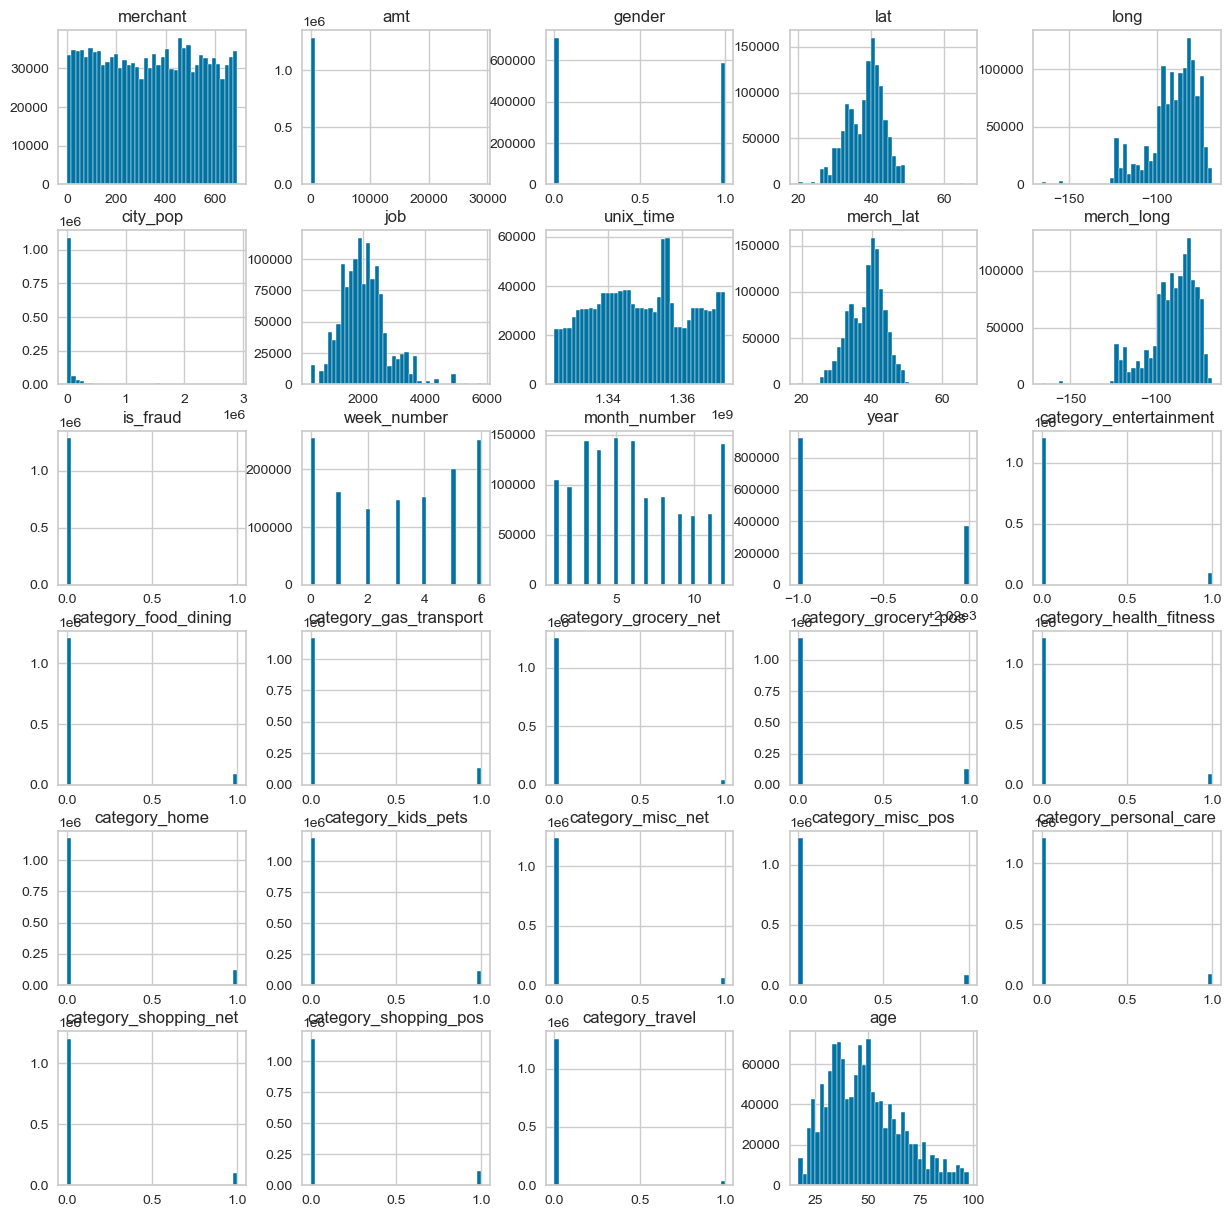

In [38]:
# show distribution of data
train_df.hist(figsize=(15, 15), bins=40)

array([[<AxesSubplot:title={'center':'merchant'}>,
        <AxesSubplot:title={'center':'amt'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'city_pop'}>,
        <AxesSubplot:title={'center':'job'}>,
        <AxesSubplot:title={'center':'unix_time'}>,
        <AxesSubplot:title={'center':'merch_lat'}>,
        <AxesSubplot:title={'center':'merch_long'}>],
       [<AxesSubplot:title={'center':'is_fraud'}>,
        <AxesSubplot:title={'center':'week_number'}>,
        <AxesSubplot:title={'center':'month_number'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'category_entertainment'}>],
       [<AxesSubplot:title={'center':'category_food_dining'}>,
        <AxesSubplot:title={'center':'category_gas_transport'}>,
        <AxesSubplot:title={'center':'category_grocery_net'}>,
        <AxesSubplot:title={'center':'cat

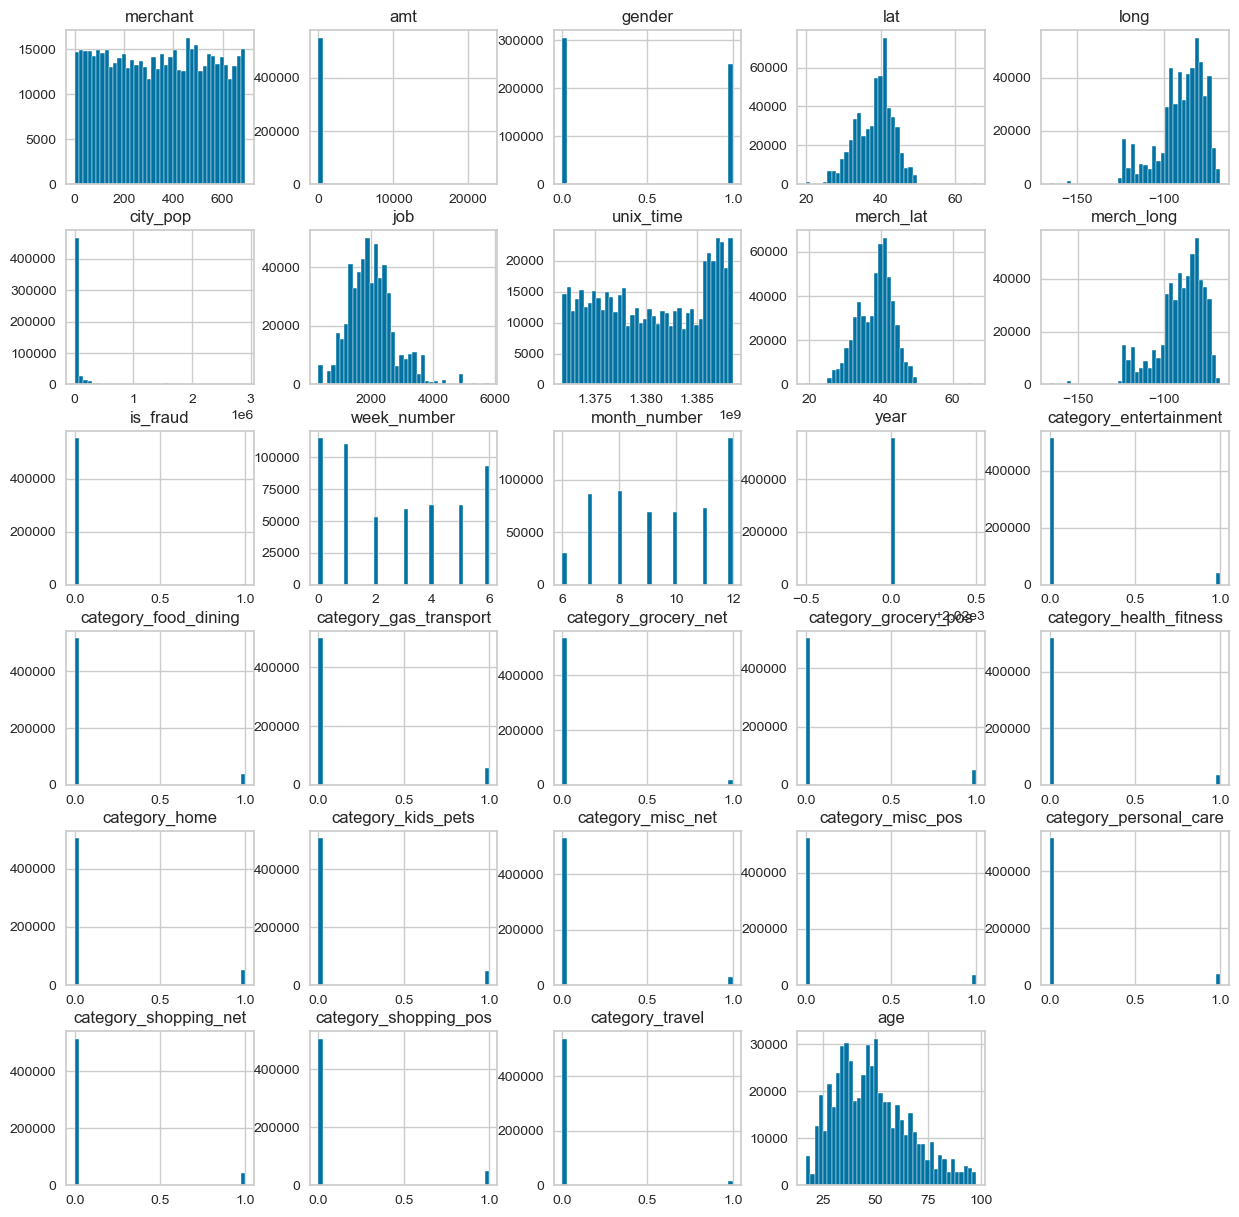

In [39]:
# show distribution of data
test_df.hist(figsize=(15, 15), bins=40)

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   merchant                 1296675 non-null  int32  
 1   amt                      1296675 non-null  float64
 2   gender                   1296675 non-null  uint8  
 3   lat                      1296675 non-null  float64
 4   long                     1296675 non-null  float64
 5   city_pop                 1296675 non-null  int64  
 6   job                      1296675 non-null  int64  
 7   unix_time                1296675 non-null  int64  
 8   merch_lat                1296675 non-null  float64
 9   merch_long               1296675 non-null  float64
 10  is_fraud                 1296675 non-null  int64  
 11  week_number              1296675 non-null  int64  
 12  month_number             1296675 non-null  int64  
 13  year                     1296675 non-null 

## Check Outliers

<AxesSubplot:xlabel='merchant'>

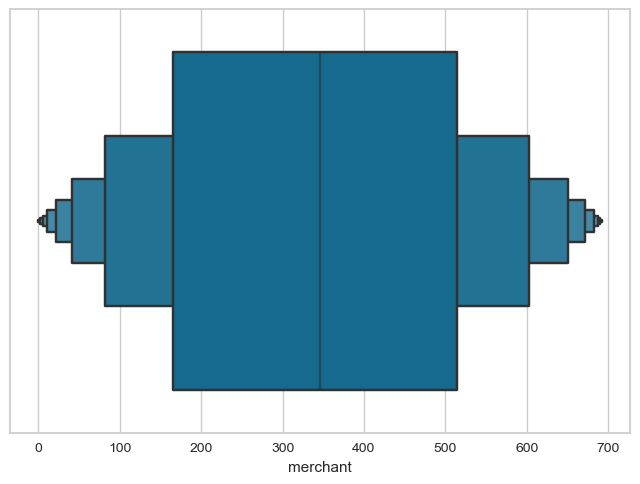

In [41]:
# plot box plot for merchant
sns.boxenplot(x=train_df['merchant'])

<AxesSubplot:xlabel='amt'>

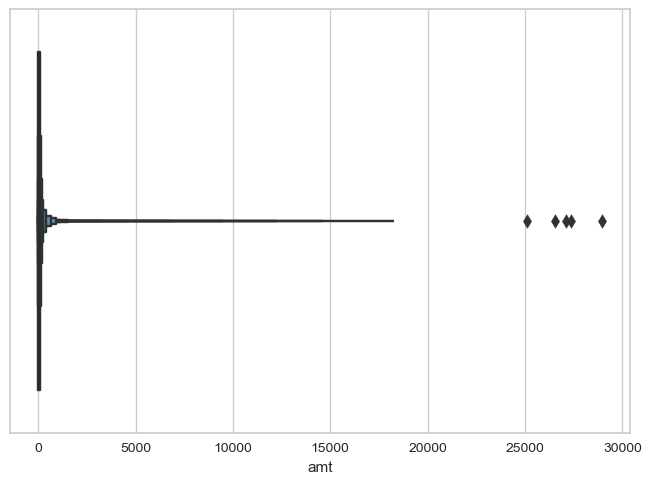

In [42]:
# plot box plot for amt
sns.boxenplot(x=train_df['amt'])

<AxesSubplot:xlabel='lat'>

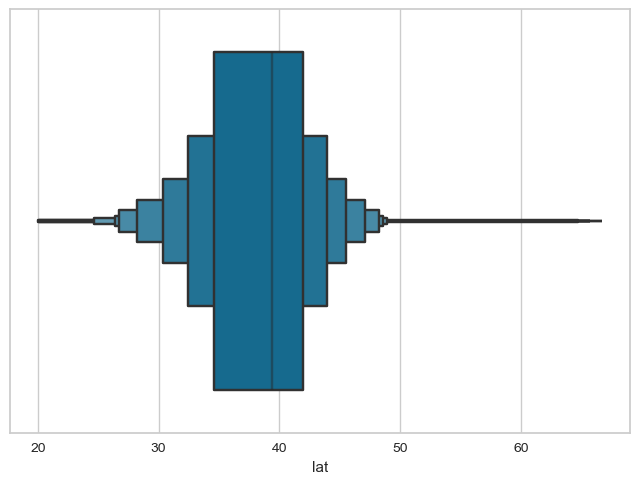

In [43]:
# plot box plot for lat
sns.boxenplot(x=train_df['lat'])

<AxesSubplot:xlabel='long'>

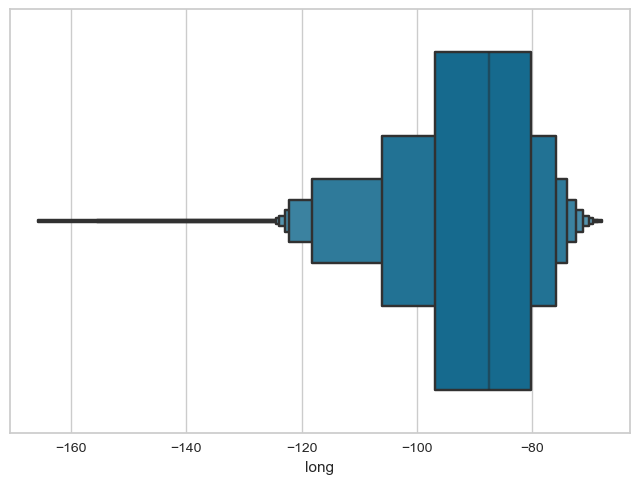

In [44]:
# plot box plot for long
sns.boxenplot(x=train_df['long'])

<AxesSubplot:xlabel='city_pop'>

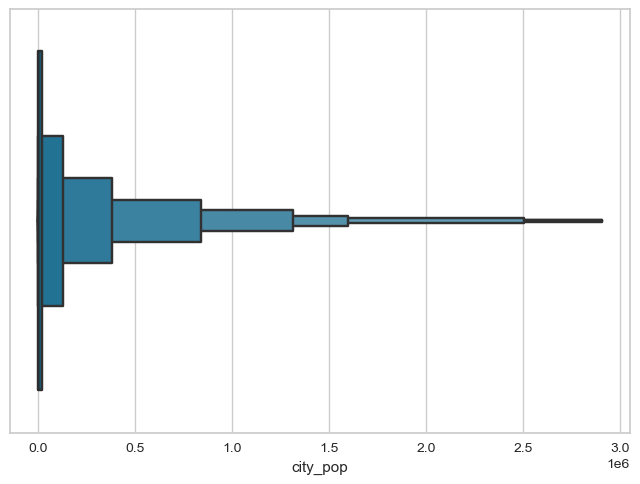

In [45]:
# plot box plot for city_pop
sns.boxenplot(x=train_df['city_pop'])

<AxesSubplot:xlabel='age'>

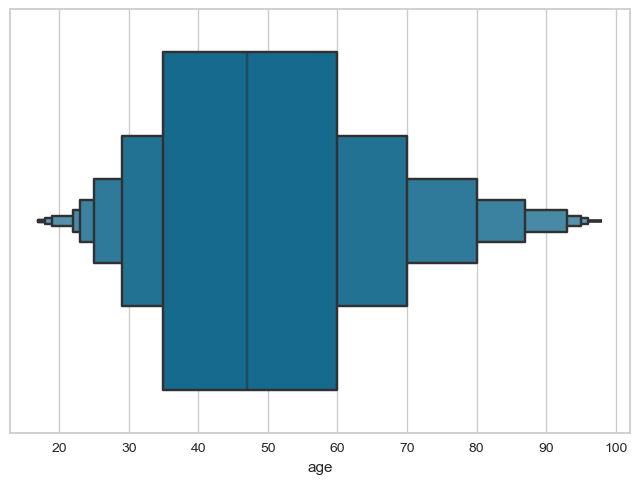

In [46]:
# plot box plot for age
sns.boxenplot(x=train_df['age'])

## Scale Dataset

In [47]:
# use Robust Scaler to reduce the effect of outliers in our dataset
robust_scaler = RobustScaler()
x_train_scaled = robust_scaler.fit_transform(train_df.drop(columns=['is_fraud'], axis=1))
x_test_scaled = robust_scaler.transform(test_df.drop(columns=['is_fraud'], axis=1))

In [48]:
# add data to dataframe
x_train_scaled = pd.DataFrame(data=x_train_scaled, columns=train_df.columns.drop('is_fraud'))
x_test_scaled = pd.DataFrame(data=x_test_scaled, columns=test_df.columns.drop('is_fraud'))

## Original Dataset

In [49]:
# initialize variables
x_original_train = x_train_scaled
x_original_test = x_test_scaled
y_original_train = train_df.is_fraud
y_original_test = test_df.is_fraud

## Use PCA as Dimensionality Reduction to decrease our features to 15 feature beacause most of over sampling or under sampling techniques work with just 15 feature like SMOTE

In [50]:
pca = PCA(n_components=15, random_state=42)
pca_x_train = pca.fit_transform(x_original_train)
pca_x_test = pca.transform(x_original_test)

In [51]:
# Function To Plot roc_auc curve
def plot_roc_auc_curve(pred, title):
    fpr, tpr, thresholds = metrics.roc_curve(y_original_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=title)
    display.plot()
    plt.show()

## Handling Data Imbalance

### Smote

<AxesSubplot:ylabel='is_fraud'>

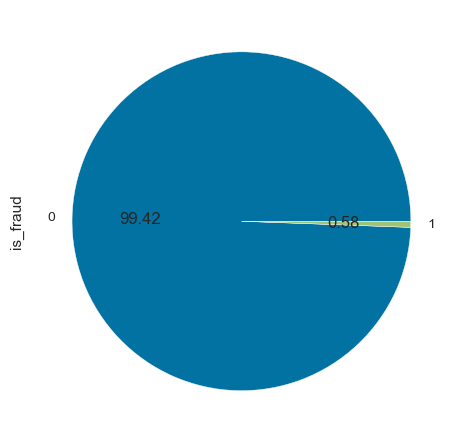

In [52]:
# show data befor sampling
y_original_train.value_counts().plot.pie(autopct='%.2f')

In [53]:
x_original_train

merchant       amt  gender       lat      long  city_pop       job  \
0        0.481375 -0.578990     0.0 -0.447479  0.378534  0.053051  0.677565   
1       -0.300860  0.812491     0.0  1.302409 -1.846971 -0.117794  1.432920   
2        0.126074  2.348483     1.0  0.386139 -1.489489  0.086699  0.877114   
3        0.040115 -0.034290     1.0  0.939398 -1.480583 -0.026398 -0.464487   
4       -0.140401 -0.075657     1.0 -0.127543  0.481611 -0.120347  1.246900   
...           ...       ...     ...       ...       ...       ...       ...   
1296670  0.438395 -0.434889     1.0 -0.223610 -1.502452 -0.112229 -0.772266   
1296671 -0.985673  0.056878     1.0 -0.011967  0.598966 -0.120296  1.462232   
1296672  0.724928  0.794802     1.0 -0.876337 -1.102284 -0.079500 -0.528749   
1296673  0.467049  0.372568     1.0  0.546223 -0.905300 -0.067909  0.263811   
1296674  0.068768 -0.588107     1.0  0.886488 -1.586412 -0.114271  0.563698   

         unix_time  merch_lat  merch_long  ...  category_health_fitness  \
0        -1.156974  -0.464366    0.323525  ...                      0.0   
1        -1.156973   1.355748   -1.845569  ...                      0.0   
2        -1.156972   0.523981   -1.483516  ...                      0.0   
3        -1.156971   1.061612   -1.507921  ...                      0.0   
4        -1.156966  -0.095615    0.528552  ...                      0.0   
...            ...        ...         ...  ...                      ...   
1296670   1.093646  -0.349468   -1.455683  ...                      0.0   
1296671   1.093646  -0.063514    0.551717  ...                      0.0   
1296672   1.093647  -0.795472   -1.061922  ...                      0.0   
1296673   1.093650   0.473900   -0.948518  ...                      0.0   
1296674   1.093650   0.996776   -1.605459  ...                      0.0   

         category_home  category_kids_pets  category_misc_net  \
0                  0.0                 0.0                1.0   
1                  0.0                 0.0                0.0   
2                  0.0                 0.0                0.0   
3                  0.0                 0.0                0.0   
4                  0.0                 0.0                0.0   
...                ...                 ...                ...   
1296670            0.0                 0.0                0.0   
1296671            0.0                 0.0                0.0   
1296672            0.0                 0.0                0.0   
1296673            0.0                 0.0                0.0   
1296674            0.0                 0.0                0.0   

         category_misc_pos  category_personal_care  category_shopping_net  \
0                      0.0                     0.0                    0.0   
1                      0.0                     0.0                    0.0   
2                      0.0                     0.0                    0.0   
3                      0.0                     0.0                    0.0   
4                      1.0                     0.0                    0.0   
...                    ...                     ...                    ...   
1296670                0.0                     0.0                    0.0   
1296671                0.0                     0.0                    0.0   
1296672                0.0                     0.0                    0.0   
1296673                0.0                     0.0                    0.0   
1296674                0.0                     0.0                    0.0   

         category_shopping_pos  category_travel   age  
0                          0.0              0.0 -0.52  
1                          0.0              0.0 -0.12  
2                          0.0              0.0  0.52  
3                          0.0              0.0  0.32  
4                          0.0              0.0 -0.44  
...                        ...              ...   ...  
1296670                    0.0              0.0  0.56  
12966

In [54]:
# initialize smote variable
smote = SMOTE(random_state=42)
smote_x_train, smote_y_train = smote.fit_resample(pca_x_train, y_original_train)

<AxesSubplot:ylabel='is_fraud'>

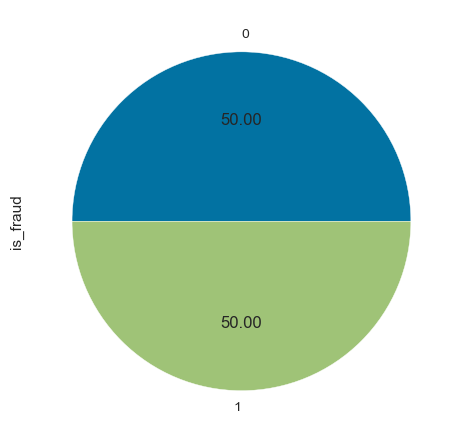

In [55]:
# show data after sampling
smote_y_train.value_counts().plot.pie(autopct='%.2f')

In [56]:
# initialize model
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(smote_x_train, smote_y_train)

LGBMClassifier(random_state=42)

In [57]:
# predict
smote_y_pred = lgbm_classifier.predict(pca_x_test)

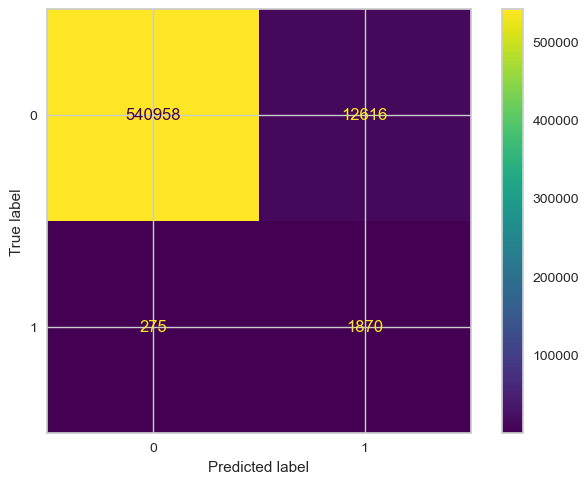

In [58]:
# plot confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_original_test, smote_y_pred)

In [59]:
# print classification report
print(metrics.classification_report(y_original_test, smote_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.13      0.87      0.22      2145

    accuracy                           0.98    555719
   macro avg       0.56      0.92      0.61    555719
weighted avg       1.00      0.98      0.99    555719



In [60]:
# roc_score
smote_roc_score = metrics.roc_auc_score(y_original_test, smote_y_pred)
print(smote_roc_score)

0.9245023920550589


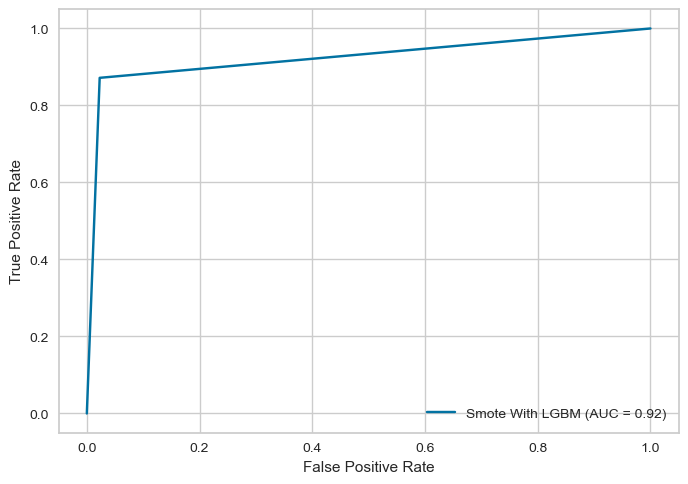

In [61]:
plot_roc_auc_curve(smote_y_pred, "Smote With LGBM")

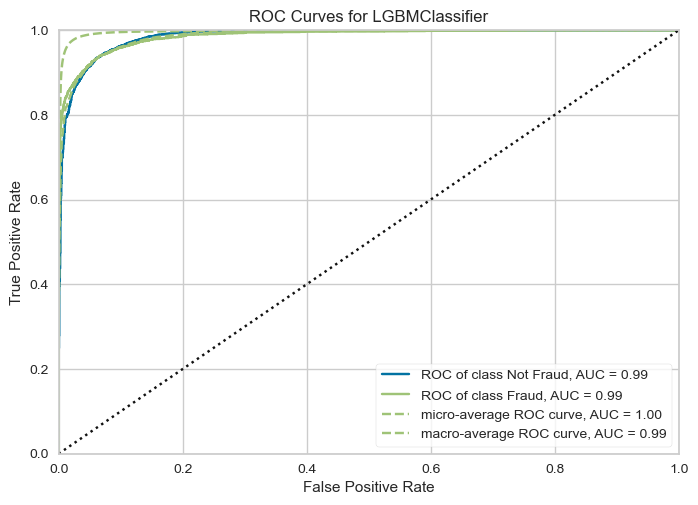

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [62]:
visualizer = ROCAUC(lgbm_classifier, classes=["Not Fraud", "Fraud"])

visualizer.fit(smote_x_train, smote_y_train)        # Fit the training data to the visualizer
visualizer.score(pca_x_test, y_original_test)        # Evaluate the model on the test data
visualizer.show() 

### RandomOverSampler

In [63]:
# initialize RandomOverSampling variable
random_over_sampler = RandomOverSampler(random_state=42)
random_over_sampler_x_train, random_over_sampler_y_train = random_over_sampler.fit_resample(pca_x_train, y_original_train)

<AxesSubplot:ylabel='is_fraud'>

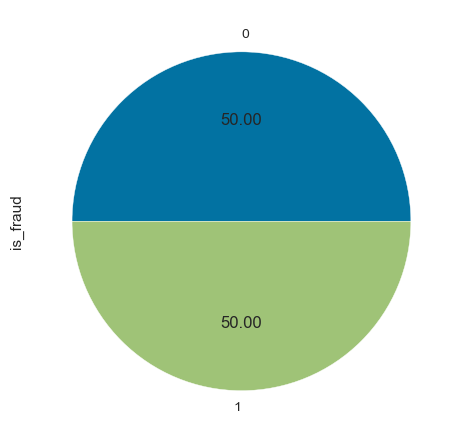

In [64]:
# show data after sampling
random_over_sampler_y_train.value_counts().plot.pie(autopct='%.2f')

In [65]:
# initialize model
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(random_over_sampler_x_train, random_over_sampler_y_train)

LGBMClassifier(random_state=42)

In [66]:
# predict
random_over_sampler_y_pred = lgbm_classifier.predict(pca_x_test)

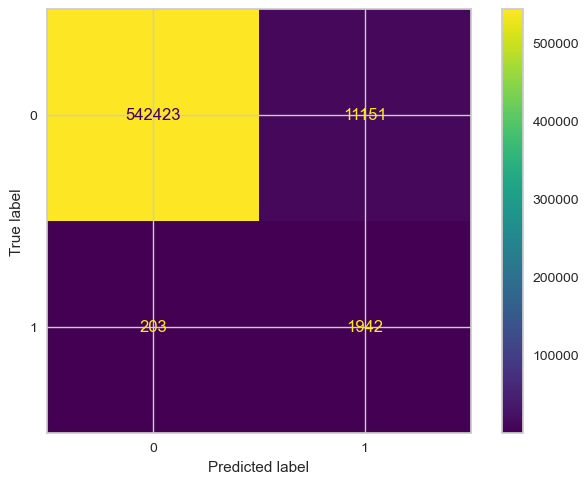

In [67]:
# plot confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_original_test, random_over_sampler_y_pred)

In [68]:
# print classification report
print(metrics.classification_report(y_original_test, random_over_sampler_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.15      0.91      0.25      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.94      0.62    555719
weighted avg       1.00      0.98      0.99    555719



In [69]:
# roc_score
random_over_sampler_roc_score = metrics.roc_auc_score(y_original_test, random_over_sampler_y_pred)
print(random_over_sampler_roc_score)

0.9426088284981584


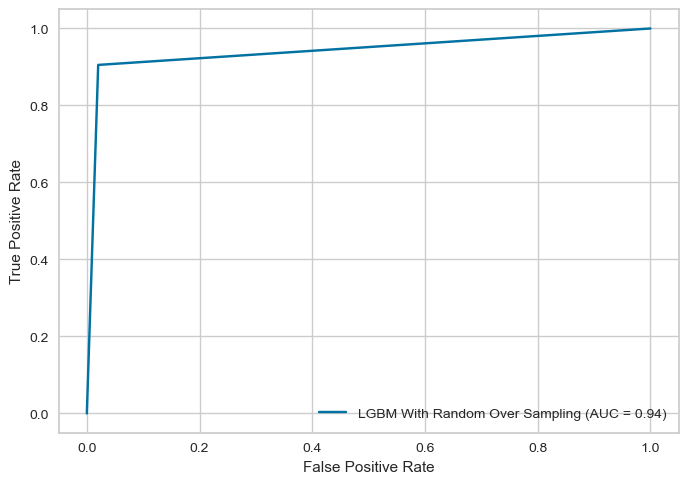

In [70]:
plot_roc_auc_curve(random_over_sampler_y_pred, "LGBM With Random Over Sampling")

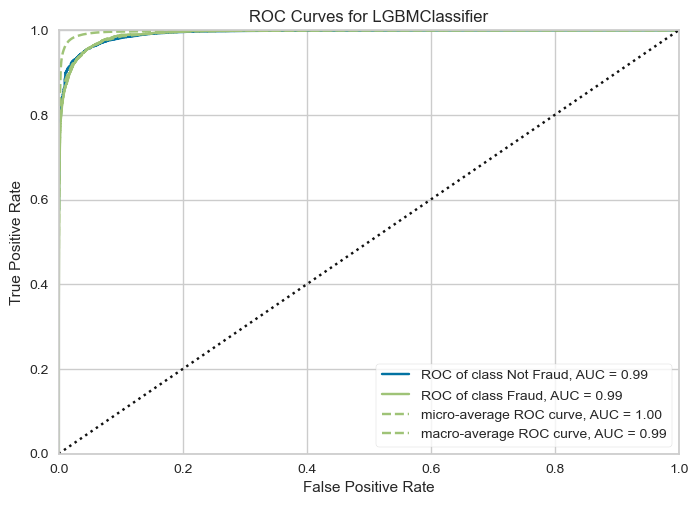

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [71]:
visualizer = ROCAUC(lgbm_classifier, classes=["Not Fraud", "Fraud"])

visualizer.fit(random_over_sampler_x_train, random_over_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(pca_x_test, y_original_test)        # Evaluate the model on the test data
visualizer.show() 

### EditedNearestNeighbours

In [72]:
# initialize EditedNearestNeighbours variable
edited_nn_sampler = EditedNearestNeighbours()
edited_nn_sampler_x_train, edited_nn_sampler_y_train = edited_nn_sampler.fit_resample(pca_x_train, y_original_train)

<AxesSubplot:ylabel='is_fraud'>

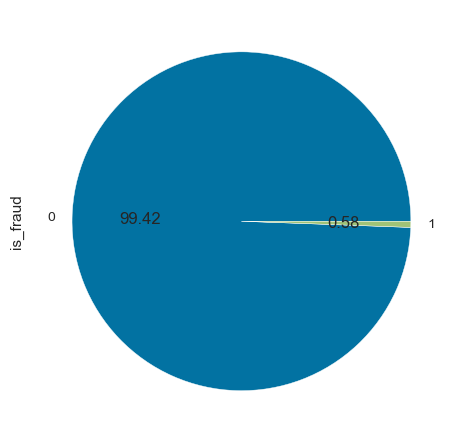

In [73]:
# show data after sampling
edited_nn_sampler_y_train.value_counts().plot.pie(autopct='%.2f')

In [74]:
# initialize model
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)

LGBMClassifier(random_state=42)

In [75]:
# predict
edited_nn_sampler_y_pred = lgbm_classifier.predict(pca_x_test)

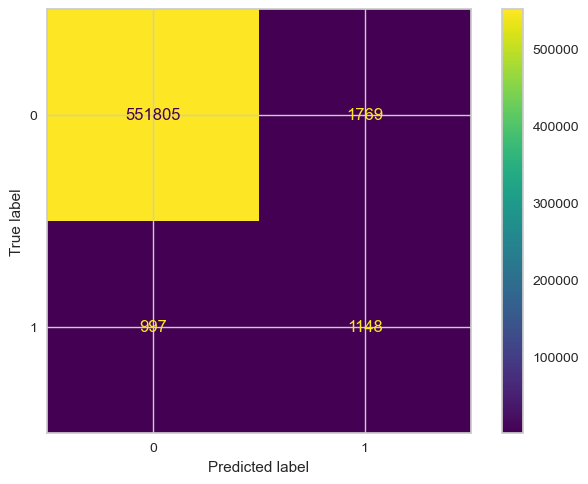

In [76]:
# plot confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_original_test, edited_nn_sampler_y_pred)

In [77]:
# print classification report
print(metrics.classification_report(y_original_test, edited_nn_sampler_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.39      0.54      0.45      2145

    accuracy                           1.00    555719
   macro avg       0.70      0.77      0.73    555719
weighted avg       1.00      1.00      1.00    555719



In [78]:
# roc_score
edited_nn_sampler_roc_score = metrics.roc_auc_score(y_original_test, edited_nn_sampler_y_pred)
print(edited_nn_sampler_roc_score)

0.7660012685694889


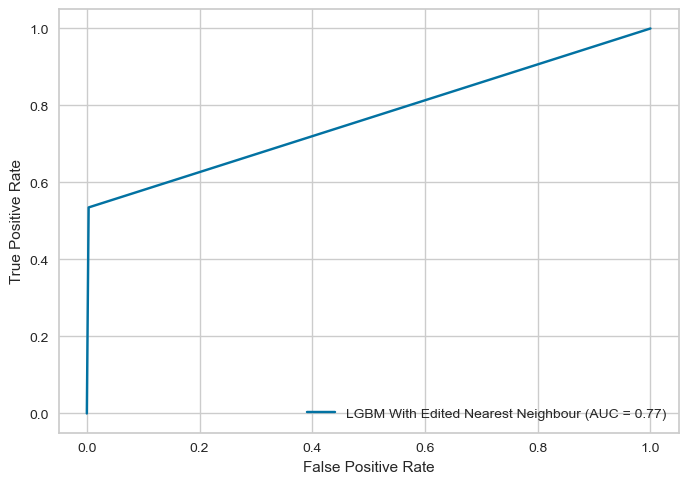

In [79]:
plot_roc_auc_curve(edited_nn_sampler_y_pred, "LGBM With Edited Nearest Neighbour")

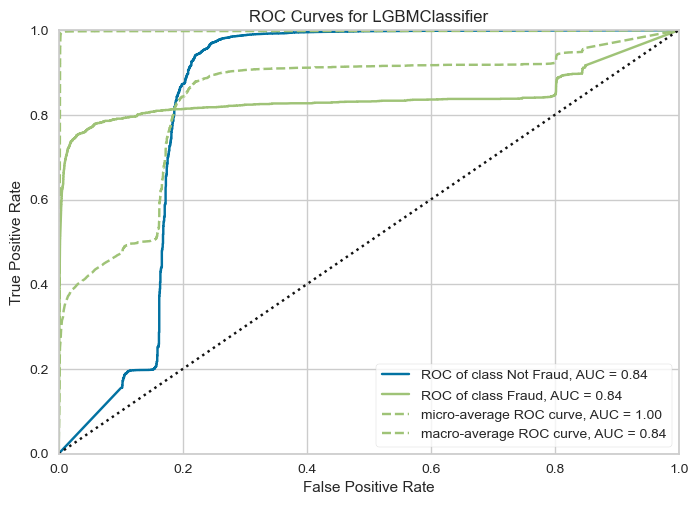

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [80]:
visualizer = ROCAUC(lgbm_classifier, classes=["Not Fraud", "Fraud"])

visualizer.fit(edited_nn_sampler_x_train, edited_nn_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(pca_x_test, y_original_test)        # Evaluate the model on the test data
visualizer.show()

### Random Under Sampling

In [81]:
# initialize RandomUnderSampling variable
random_under_sampler = RandomUnderSampler(random_state=42)
random_under_sampler_x_train, random_under_sampler_y_train = random_under_sampler.fit_resample(pca_x_train, y_original_train)

<AxesSubplot:ylabel='is_fraud'>

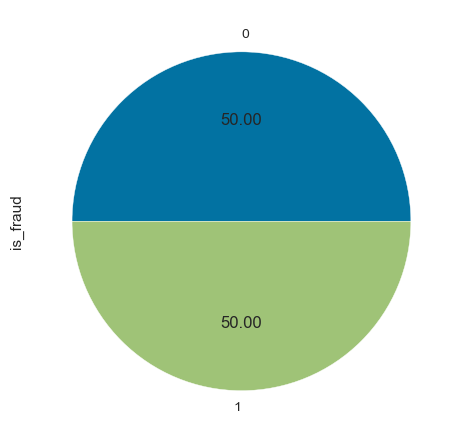

In [82]:
# show data after sampling
random_under_sampler_y_train.value_counts().plot.pie(autopct='%.2f')

In [83]:
# initialize model
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(random_under_sampler_x_train, random_under_sampler_y_train)

LGBMClassifier(random_state=42)

In [84]:
# predict
random_under_sampler_y_pred = lgbm_classifier.predict(pca_x_test)

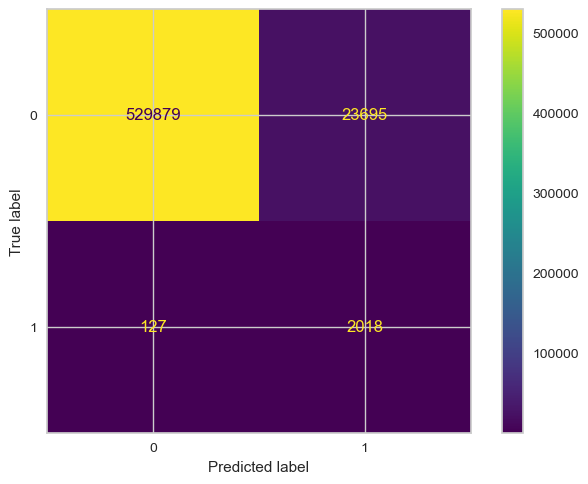

In [85]:
# plot confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_original_test, random_under_sampler_y_pred)

In [86]:
# print classification report
print(metrics.classification_report(y_original_test, random_under_sampler_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.94      0.14      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.95      0.56    555719
weighted avg       1.00      0.96      0.97    555719



In [87]:
# roc_score
random_under_sampler_roc_score = metrics.roc_auc_score(y_original_test, random_under_sampler_y_pred)
print(random_under_sampler_roc_score)

0.94899443432738


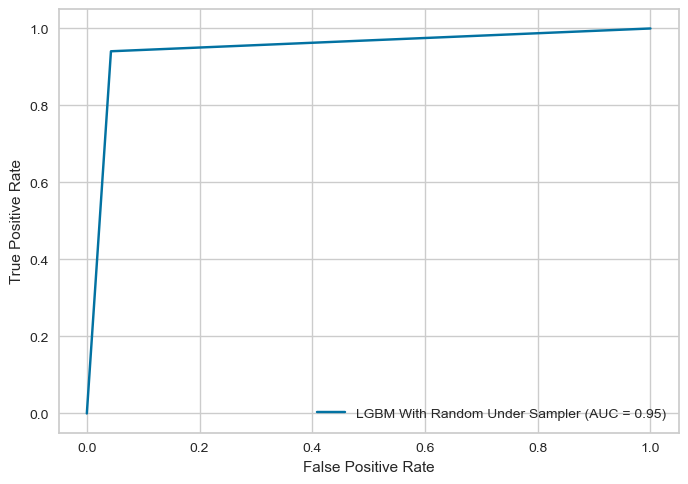

In [88]:
plot_roc_auc_curve(random_under_sampler_y_pred, "LGBM With Random Under Sampler")

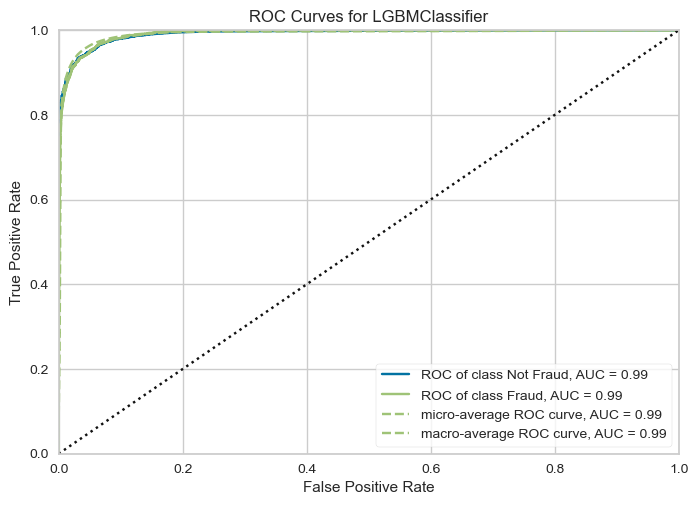

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [89]:
visualizer = ROCAUC(lgbm_classifier, classes=["Not Fraud", "Fraud"])

visualizer.fit(random_under_sampler_x_train, random_under_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(pca_x_test, y_original_test)        # Evaluate the model on the test data
visualizer.show()

### Chosse The Best Technique To Handle Imbalanced Dataset ...

In [90]:
# initialize Values
techniques = ['SMOTE', 'RandomOverSampling', 'EditedNearestNeighbours', 'RandomUnderSampling']
techniques_roc_auc_scores = [smote_roc_score, random_over_sampler_roc_score, edited_nn_sampler_roc_score, random_under_sampler_roc_score]

In [91]:
# Plot The Result Using Plotly
px.bar(x=techniques, y=techniques_roc_auc_scores, color=techniques, title="Techniques ROC_AUC Scores").update_layout(
    xaxis_title="Techniques", 
    yaxis_title="Roc_Auc_Score"
)

Text(0, 0.5, 'ROC_AUC Score')

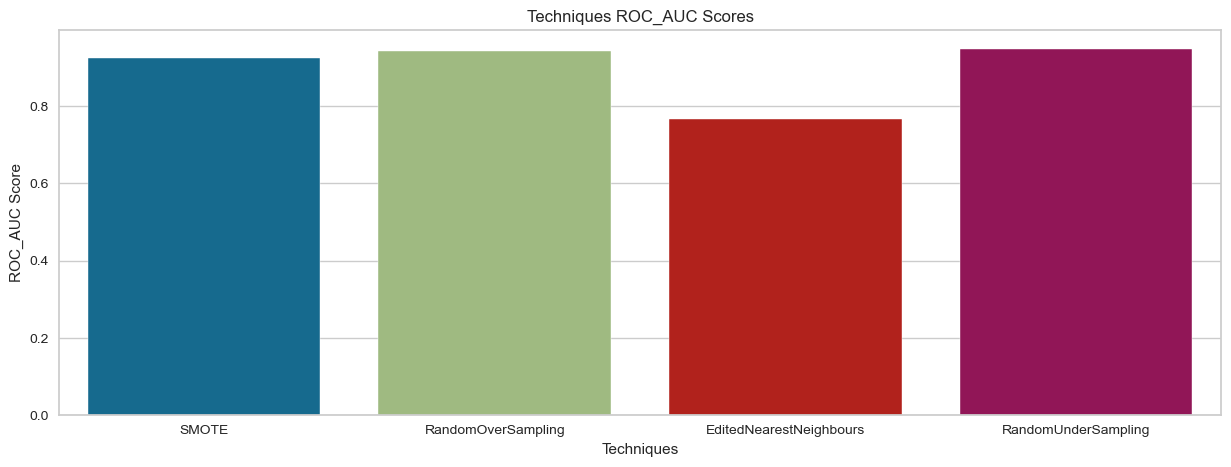

In [92]:
# plot using seaborn
plt.figure(figsize=(15, 5))
plt.title('Techniques ROC_AUC Scores')
sns.barplot(x=techniques, y=techniques_roc_auc_scores)
plt.xlabel("Techniques")
plt.ylabel("ROC_AUC Score")

## Feature Selection

In [93]:
# show correlation between features
random_under_sampler_df = pd.DataFrame(random_under_sampler_x_train)
random_under_sampler_df['is_fraud'] = random_under_sampler_y_train
pca_x_test_df = pd.DataFrame(pca_x_test)
pca_x_test_df['is_fraud'] = y_original_test
random_under_sampler_df.corr()

0         1         2         3         4         5  \
0         1.000000  0.024095  0.020473 -0.008849 -0.007457  0.001639   
1         0.024095  1.000000 -0.022681  0.017685  0.000910 -0.002597   
2         0.020473 -0.022681  1.000000  0.061631  0.004084  0.011087   
3        -0.008849  0.017685  0.061631  1.000000 -0.009157 -0.012256   
4        -0.007457  0.000910  0.004084 -0.009157  1.000000 -0.003692   
5         0.001639 -0.002597  0.011087 -0.012256 -0.003692  1.000000   
6         0.031064  0.087397 -0.006668 -0.019447 -0.004047  0.013476   
7        -0.009340 -0.028118 -0.012728 -0.018786  0.006057  0.048352   
8        -0.010405  0.009940  0.000307  0.004967  0.010794  0.013895   
9         0.015488  0.016889 -0.003810 -0.000320 -0.003907  0.038078   
10        0.014349  0.068977  0.012337  0.009911 -0.026479  0.006042   
11        0.013157 -0.106774  0.008998  0.002520  0.008599 -0.008488   
12       -0.002956  0.145902  0.002062 -0.002452 -0.007646  0.002515   
13        0.001529  0.297977 -0.009650  0.006336  0.002024 -0.004941   
14        0.011297 -0.048032  0.005090  0.007465 -0.002135 -0.006573   
is_fraud  0.022430  0.620092 -0.024135  0.019618  0.002141 -0.015581   

                 6         7         8         9        10        11  \
0         0.031064 -0.009340 -0.010405  0.015488  0.014349  0.013157   
1         0.087397 -0.028118  0.009940  0.016889  0.068977 -0.106774   
2        -0.006668 -0.012728  0.000307 -0.003810  0.012337  0.008998   
3        -0.019447 -0.018786  0.004967 -0.000320  0.009911  0.002520   
4        -0.004047  0.006057  0.010794 -0.003907 -0.026479  0.008599   
5         0.013476  0.048352  0.013895  0.038078  0.006042 -0.008488   
6         1.000000  0.009156  0.001865  0.031981 -0.001918 -0.008322   
7         0.009156  1.000000  0.002972 -0.012290  0.033250  0.003655   
8         0.001865  0.002972  1.000000  0.002864  0.012786 -0.004200   
9         0.031981 -0.012290  0.002864  1.000000 -0.006163  0.002786   
10       -0.001918  0.033250  0.012786 -0.006163  1.000000  0.022159   
11       -0.008322  0.003655 -0.004200  0.002786  0.022159  1.000000   
12       -0.036128  0.029195 -0.007159  0.000309 -0.057919  0.158566   
13        0.022048 -0.001161  0.005458  0.006017 -0.019998  0.067787   
14       -0.043236 -0.001664 -0.005047 -0.015057 -0.018897  0.040976   
is_fraud  0.083780 -0.074259  0.003018  0.027193  0.042525 -0.011320   

                12        13        14  is_fraud  
0        -0.002956  0.001529  0.011297  0.022430  
1         0.145902  0.297977 -0.048032  0.620092  
2         0.002062 -0.009650  0.005090 -0.024135  
3        -0.002452  0.006336  0.007465  0.019618  
4        -0.007646  0.002024 -0.002135  0.002141  
5         0.002515 -0.004941 -0.006573 -0.015581  
6        -0.036128  0.022048 -0.043236  0.083780  
7         0.029195 -0.001161 -0.001664 -0.074259  
8        -0.007159  0.005458 -0.005047  0.003018  
9         0.000309  0.006017 -0.015057  0.027193  
10       -0.057919 -0.019998 -0.018897  0.042525  
11        0.158566  0.067787  0.040976 -0.011320  
12        1.000000  0.369888  0.111299 -0.103696  
13        0.369888  1.000000 -0.028841  0.007755  
14        0.111299 -0.028841  1.000000 -0.056709  
is_fraud -0.103696  0.007755 -0.056709  1.000000

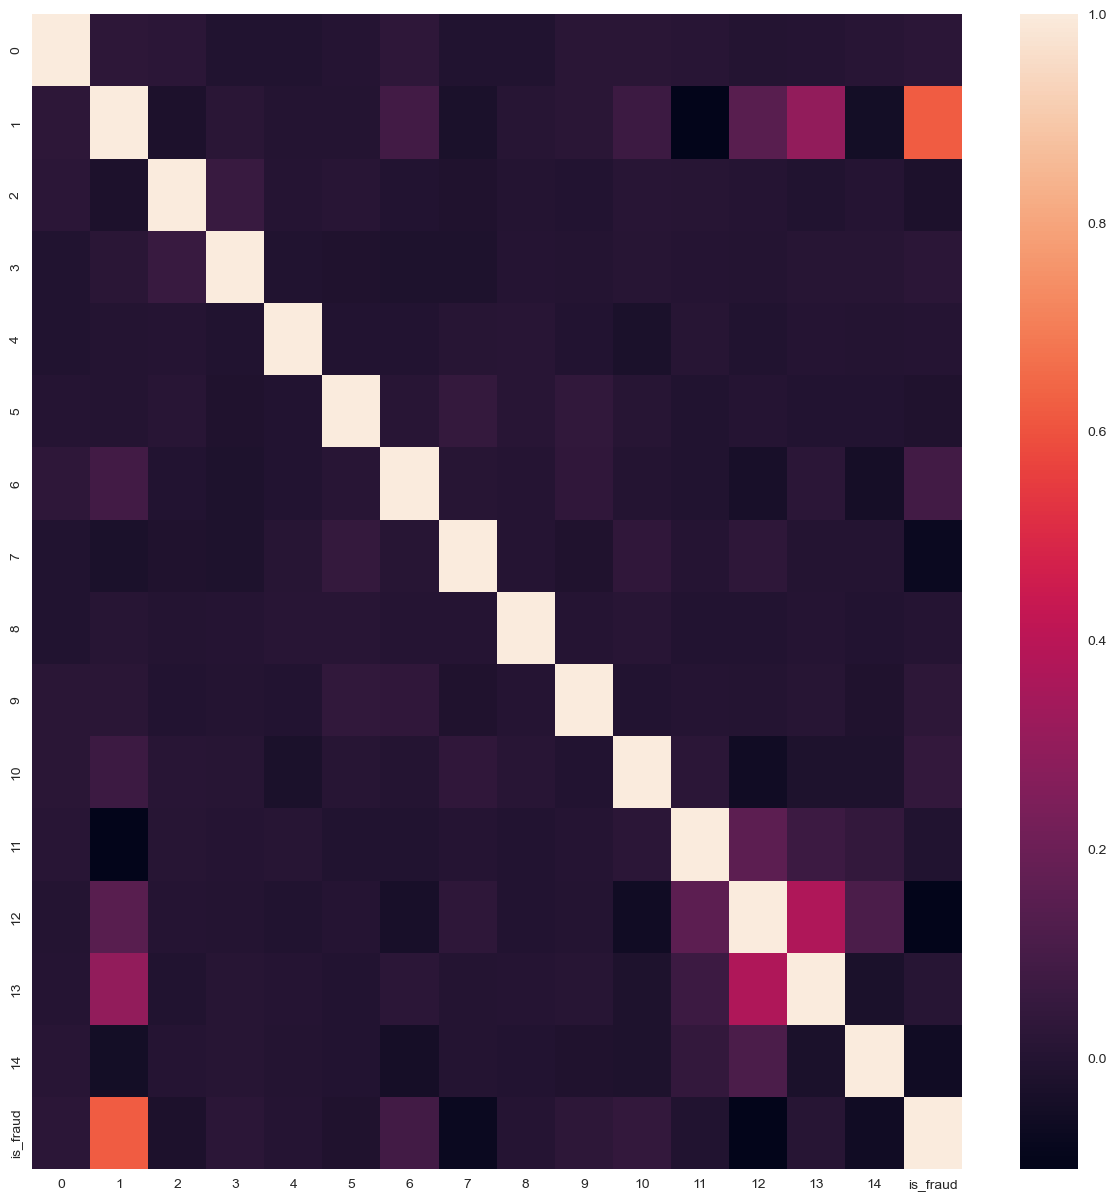

In [94]:
plt.figure(figsize=(15, 15))
sns.heatmap(random_under_sampler_df.corr())
plt.show()

### f_regression Feature Selection

In [95]:
# initialize parameters
f_reg = f_regression(X=random_under_sampler_x_train, y=random_under_sampler_y_train)

In [96]:
f_reg[1].round(3)

array([0.006, 0.   , 0.003, 0.016, 0.793, 0.056, 0.   , 0.   , 0.712,
       0.001, 0.   , 0.165, 0.   , 0.342, 0.   ])

In [97]:
random_under_sampler_df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'is_fraud'], dtype='object')

In [98]:
f_regression_x_train = random_under_sampler_df[random_under_sampler_df.columns.drop([4, 8, 'is_fraud'])]
f_regression_x_test = pca_x_test_df[pca_x_test_df.columns.drop([4, 8, 'is_fraud'])]

In [99]:
# calculate roc_score after using f_regression feature selection
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(f_regression_x_train, random_under_sampler_y_train)

LGBMClassifier(random_state=42)

In [100]:
# predict x_test
f_regression_feature_selection_y_pred = lgbm_classifier.predict(f_regression_x_test)

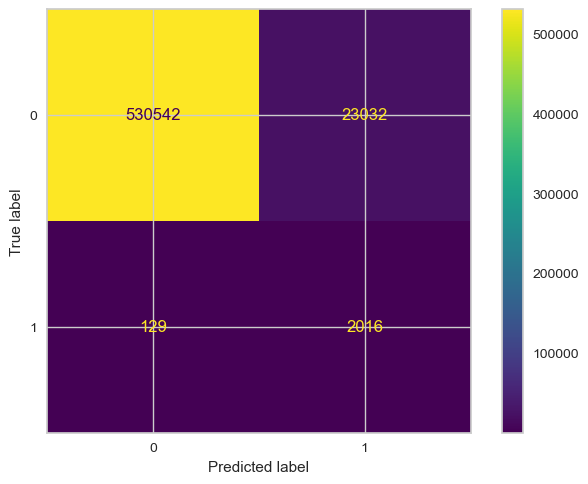

In [101]:
# plot confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_original_test, f_regression_feature_selection_y_pred)

In [102]:
# print classification report
print(metrics.classification_report(y_original_test, f_regression_feature_selection_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.94      0.15      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.95      0.56    555719
weighted avg       1.00      0.96      0.98    555719



In [103]:
# roc_score
f_regression_feature_selection_roc_score = metrics.roc_auc_score(y_original_test, f_regression_feature_selection_y_pred)
print(f_regression_feature_selection_roc_score)

0.9491270697891673


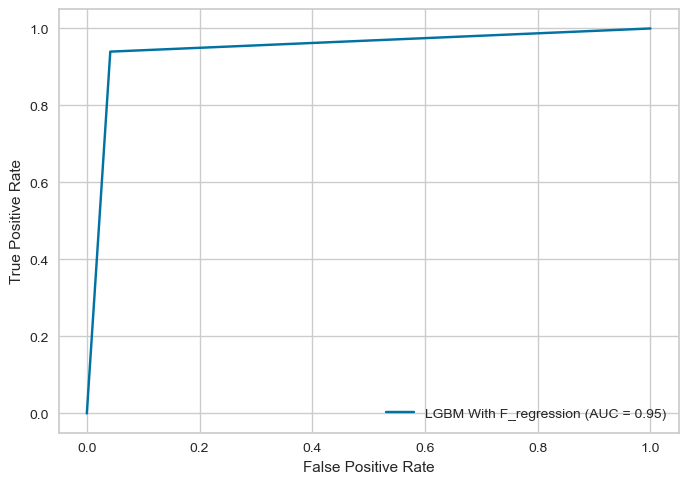

In [104]:
plot_roc_auc_curve(f_regression_feature_selection_y_pred, "LGBM With F_regression")

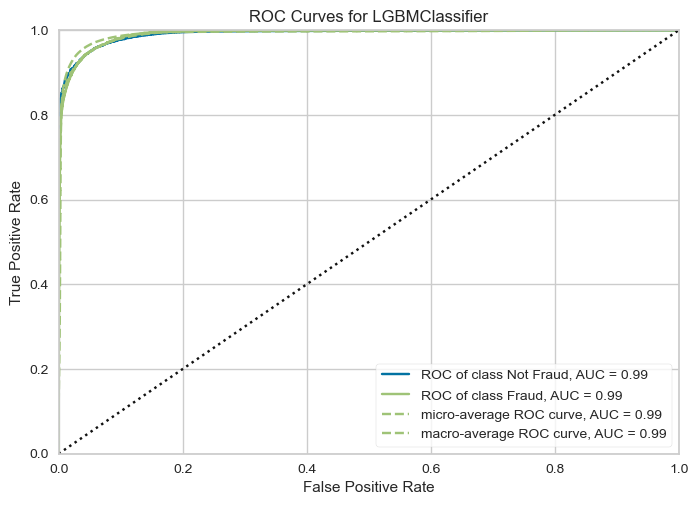

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [105]:
visualizer = ROCAUC(lgbm_classifier, classes=["Not Fraud", "Fraud"])

visualizer.fit(f_regression_x_train, random_under_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(f_regression_x_test, y_original_test)        # Evaluate the model on the test data
visualizer.show()

### mutual_info_classif

In [106]:
mutal_info = mutual_info_classif(random_under_sampler_x_train, random_under_sampler_y_train)

In [107]:
mutal_info

array([0.12258046, 0.45296895, 0.00567116, 0.00289033, 0.04567649,
       0.02903288, 0.01835619, 0.03655547, 0.0147632 , 0.05268858,
       0.00374269, 0.14815584, 0.44297894, 0.19135748, 0.26543582])

In [108]:
mutal_info_x_train = random_under_sampler_df[random_under_sampler_df.columns.drop([2, 3, 10, 'is_fraud'])]
mutal_info_x_test = pca_x_test_df[pca_x_test_df.columns.drop([2, 3, 10, 'is_fraud'])]

In [109]:
# calculate roc_score after using f_regression feature selection
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(mutal_info_x_train, random_under_sampler_y_train)

LGBMClassifier(random_state=42)

In [110]:
# predict x_test
mutal_info_feature_selection_y_pred = lgbm_classifier.predict(mutal_info_x_test)

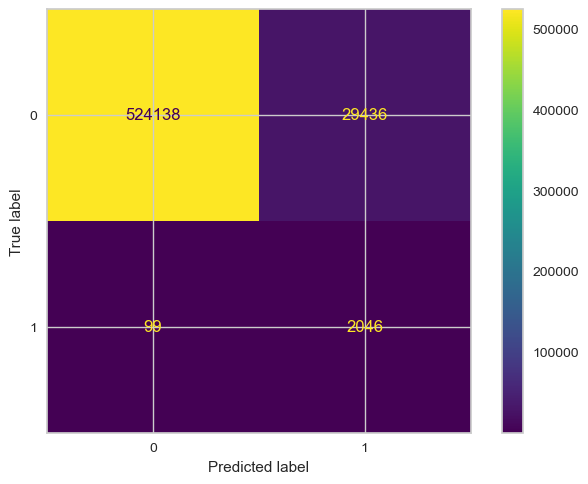

In [111]:
# plot confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_original_test, mutal_info_feature_selection_y_pred)

In [112]:
# print classification report
print(metrics.classification_report(y_original_test, mutal_info_feature_selection_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.95      0.12      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.95      0.55    555719
weighted avg       1.00      0.95      0.97    555719



In [113]:
# roc_score
mutal_info_feature_selection_roc_score = metrics.roc_auc_score(y_original_test, mutal_info_feature_selection_y_pred)
print(mutal_info_feature_selection_roc_score)

0.9503358455863452


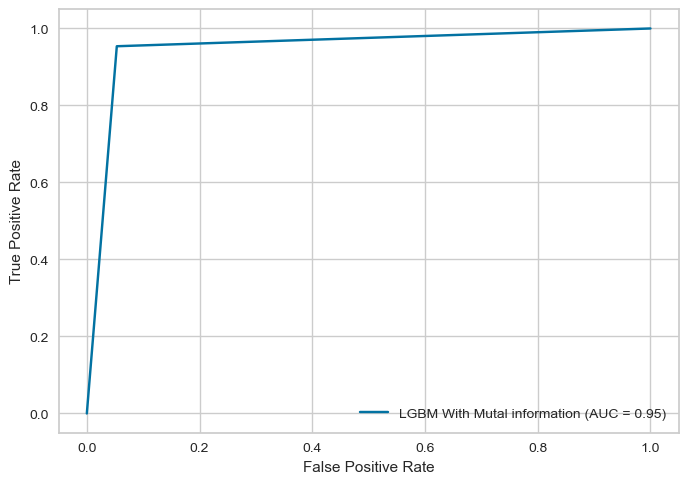

In [114]:
plot_roc_auc_curve(mutal_info_feature_selection_y_pred, "LGBM With Mutal information")

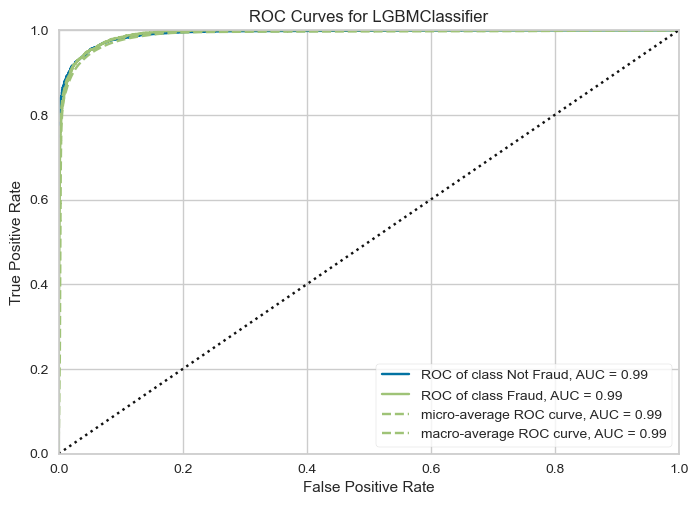

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [115]:
visualizer = ROCAUC(lgbm_classifier, classes=["Not Fraud", "Fraud"])

visualizer.fit(mutal_info_x_train, random_under_sampler_y_train)        # Fit the training data to the visualizer
visualizer.score(mutal_info_x_test, y_original_test)        # Evaluate the model on the test data
visualizer.show()

### Plot Result Of Feature Selection

In [116]:
# initialize Variables
feature_selection_methods = ['Without Feature Selection', 'f_regression', 'mutal_information']
feature_selection_methods_roc_score = [random_under_sampler_roc_score, f_regression_feature_selection_roc_score, mutal_info_feature_selection_roc_score]

In [117]:
# Plot The Result Using Plotly
px.bar(x=feature_selection_methods, y=feature_selection_methods_roc_score, color=feature_selection_methods, title="Feature Selection Methods").update_layout(
    xaxis_title="Feature Selection", 
    yaxis_title="Roc_Auc_Score"
)

Text(0, 0.5, 'Roc_Auc_Score')

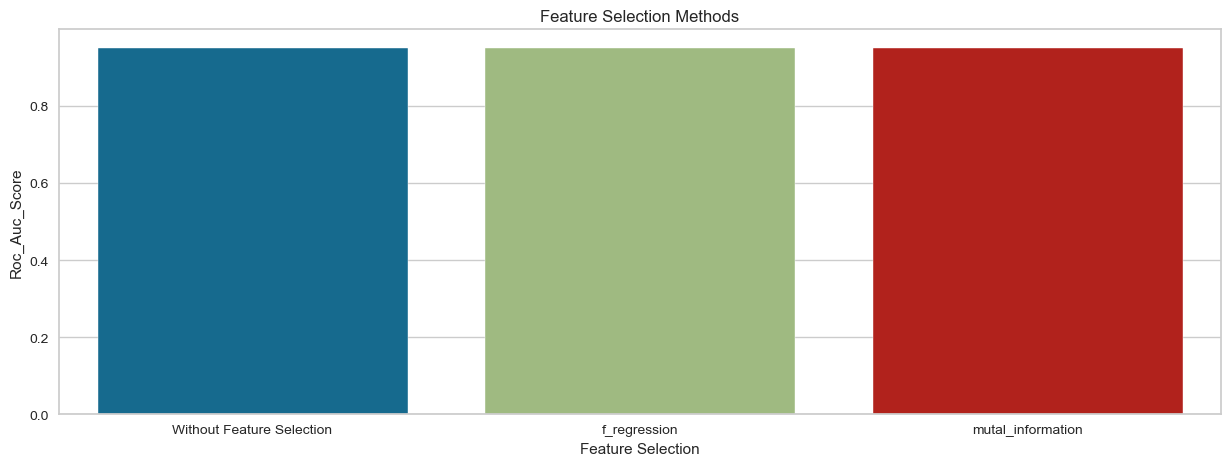

In [118]:
# plot using seaborn
plt.figure(figsize=(15, 5))
plt.title('Feature Selection Methods')
sns.barplot(x=feature_selection_methods, y=feature_selection_methods_roc_score)
plt.xlabel("Feature Selection")
plt.ylabel("Roc_Auc_Score")

## Initialize x_train, y_train, x_test, y_test Variables

In [119]:
# from the previous experiments we find that random under sampling is the best technique to solve data impalance
# from the previous experiments we find that mutal information is the best feature selection method
X_train = mutal_info_x_train
y_train = random_under_sampler_y_train
X_test = mutal_info_x_test
y_test = y_original_test

# Modeling

## Traditional Ml models


In [120]:
#Area under Curve  to evaluate the quality of a binary classification model
#by measuring the area as much the model closer to the ideal model will be great model 
def ROC_curve(ytest,ypred):
  FPR, TPR, _ = metrics.roc_curve(ytest,  ypred)
  auc = metrics.roc_auc_score(ytest, ypred)
  #create ROC curve
  plt.plot(FPR,TPR,label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc=4)
  plt.show()

In [121]:
Accuracy={}
Precision={}
Recall={}
F1_score={}
models = []

### Logistic Regression

####BaseLine

In [122]:
basic_LR= LogisticRegression()
basic_LR.fit(X_train, y_train)
LR_pred = basic_LR.predict(X_test)

In [123]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {basic_LR.score(X_train, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {basic_LR.score(X_test, y_test)*100} %')

Training Accuracy	: 82.21422861710631 %
Testing Accuracy	:  96.43866774394974 %


In [124]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.07      0.72      0.14      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.84      0.56    555719
weighted avg       1.00      0.96      0.98    555719



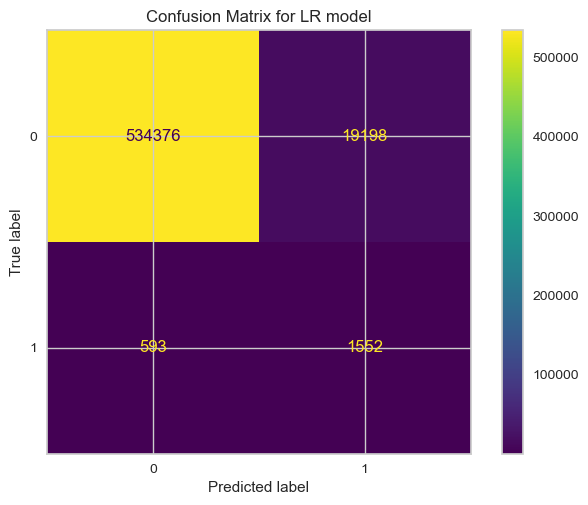

In [125]:
base_cm = confusion_matrix(y_test, LR_pred)
display = ConfusionMatrixDisplay(base_cm).plot()
plt.title("Confusion Matrix for LR model")
plt.show()

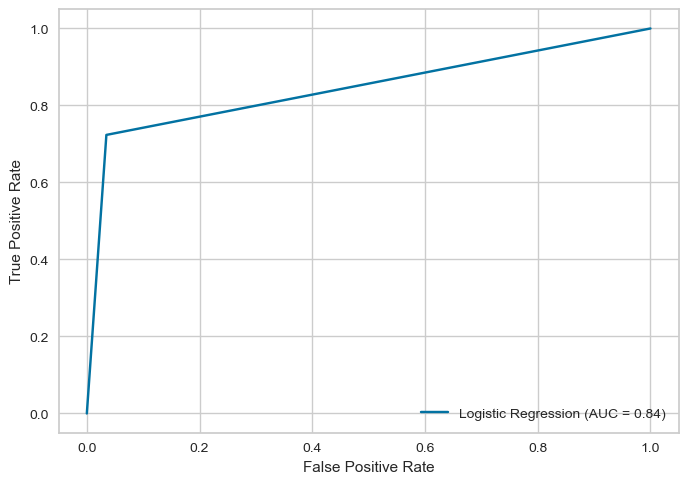

In [126]:
plot_roc_auc_curve(LR_pred, "Logistic Regression")

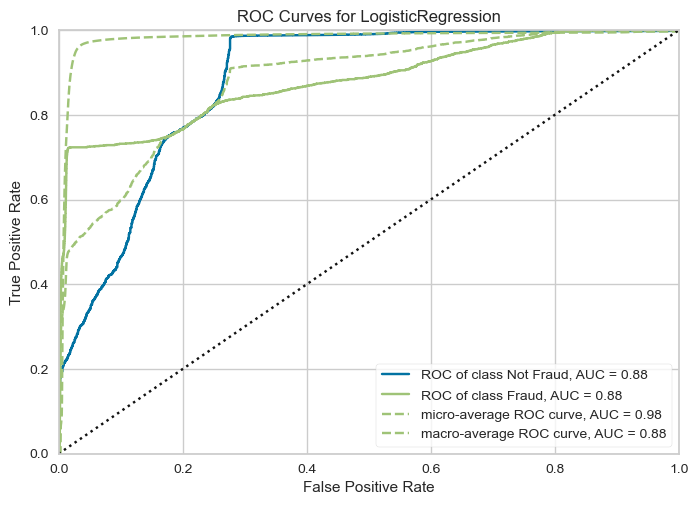

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [127]:
visualizer = ROCAUC(basic_LR, classes=["Not Fraud", "Fraud"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [128]:
Accuracy['LogisticRegression']=accuracy_score(y_test,LR_pred)
Precision['LogisticRegression']=precision_score(y_test,LR_pred)
Recall['LogisticRegression']=recall_score(y_test,LR_pred)
F1_score['LogisticRegression']=f1_score(y_test,LR_pred)
models.append(basic_LR)

####Grid Search

In [129]:
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [130]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=basic_LR, param_grid=LRparam_grid,cv=cv, scoring='recall')
grid_result = grid_search.fit(X_train, y_train)


C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anacond

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anacond

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anacond

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\hrelh\anacond

In [131]:
# summarize
print('Mean Accuracy: %.3f' % grid_result.best_score_)
print('parameters: %s' % grid_result.best_params_)

Mean Accuracy: 0.761
parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


####Tuned Logistic Regression

In [132]:
LR_model = LogisticRegression(C= 0.001, penalty= 'l1',solver='saga')
LR_model.fit(X_train, y_train)
LR_y_pred = LR_model.predict(X_test)

In [133]:
print(f'Training Accuracy\t: {LR_model.score(X_train, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {LR_model.score(X_test, y_test)*100} %')

Training Accuracy	: 86.07114308553157 %
Testing Accuracy	:  96.25728110789805 %


In [134]:
print(classification_report(y_test, LR_y_pred)) #get the evalutions matrices for  LR

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.07      0.75      0.13      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.86      0.56    555719
weighted avg       1.00      0.96      0.98    555719



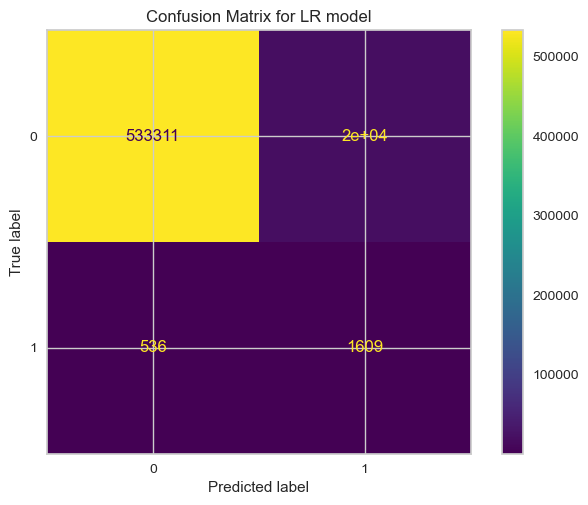

In [135]:
LR_cm = confusion_matrix(y_test, LR_y_pred)
display = ConfusionMatrixDisplay(LR_cm).plot()
plt.title("Confusion Matrix for LR model")
plt.show()

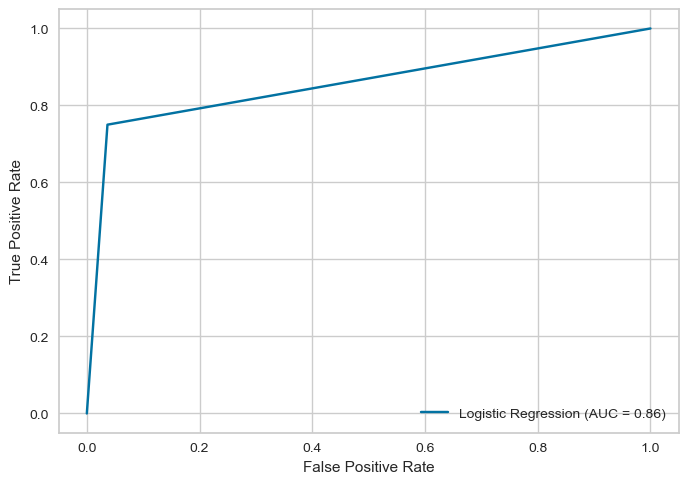

In [136]:
plot_roc_auc_curve(LR_y_pred, "Logistic Regression")

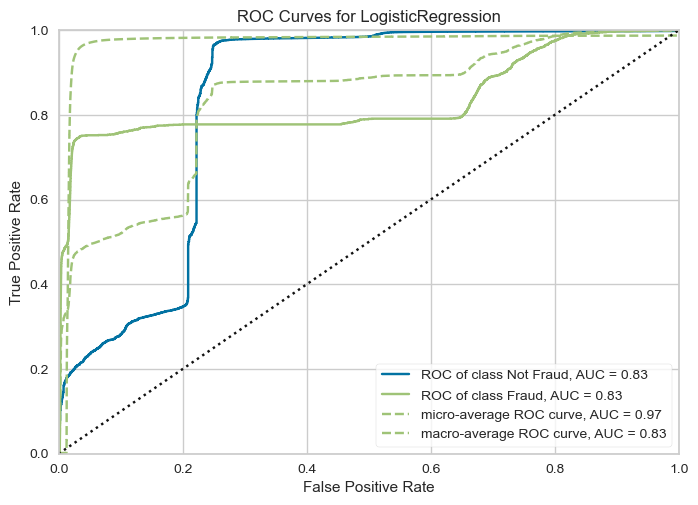

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [137]:
visualizer = ROCAUC(LR_model, classes=["Not Fraud", "Fraud"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### SVM

####Baseline

In [138]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [139]:
svm_pred = svm_model.predict(X_test)
print("Size of training set: ", X_test.shape)
print(svm_pred.shape)

Size of training set:  (555719, 12)
(555719,)


In [140]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {svm_model.score(X_train, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {svm_model.score(X_test, y_test)*100} %')

Training Accuracy	: 85.27844391153744 %
Testing Accuracy	:  96.47663657352007 %


In [141]:
accuracy_score(y_test, svm_pred)*100

96.47663657352007

In [142]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.08      0.72      0.14      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.84      0.56    555719
weighted avg       1.00      0.96      0.98    555719



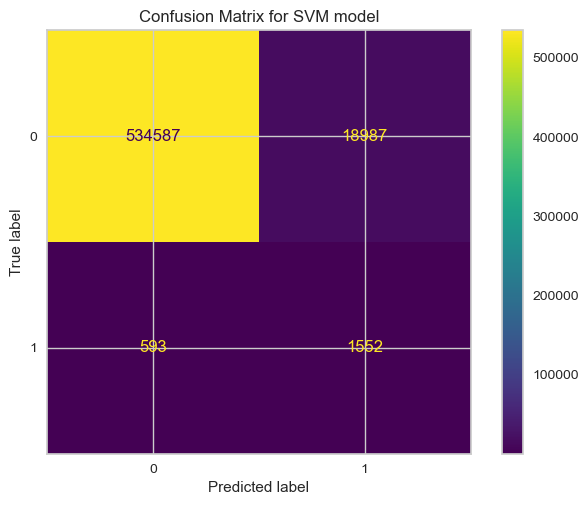

In [143]:
svm_cm = confusion_matrix(y_test, svm_pred)
display = ConfusionMatrixDisplay(svm_cm).plot()
plt.title("Confusion Matrix for SVM model")
plt.show()

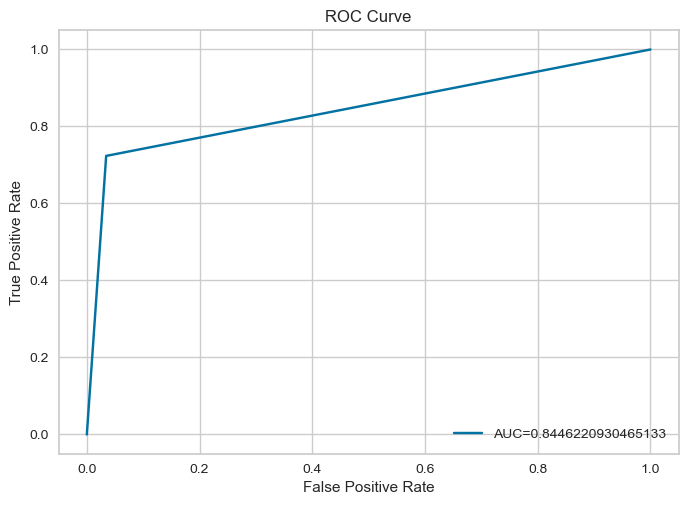

In [144]:
ROC_curve(y_test,svm_pred)

In [145]:
Accuracy['SVM']=accuracy_score(y_test,svm_pred)
Precision['SVM']=precision_score(y_test,svm_pred)
Recall['SVM']=recall_score(y_test,svm_pred)
F1_score['SVM']=f1_score(y_test,svm_pred)
models.append(svm_model)

####Gridsearch

In [146]:
svm_params =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                 'C': [0.001, 0.10, 0.1, 10, 100]},
                {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                 'C': [0.001, 0.10, 0.1, 10, 100] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 100]}]  


In [147]:
svm_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
SVM_grid = GridSearchCV(estimator=svm_model, 
                 param_grid=svm_params, 
                 cv=svm_cv,   
                 scoring='recall') 
SVM_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [0.001, 0.1, 0.1, 10, 100],
                          'gamma': [0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.1, 0.1, 10, 100],
                          'gamma': [0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['sigmoid']},
                         {'C': [0.001, 0.1, 0.1, 10, 100],
                          'kernel': ['linear']}],
             scoring='recall')

In [148]:
# summarize
print('Mean Accuracy: %.3f' % SVM_grid.best_score_)
print('parameters: %s' % SVM_grid.best_params_)

Mean Accuracy: 0.839
parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


####Tuned SVM

In [149]:
tuned_svm_model = svm.SVC()
tuned_svm_model.fit(X_train, y_train)

SVC()

In [150]:
tuned_svm_pred = tuned_svm_model.predict(X_test)
print("Size of training set: ", X_test.shape)
print(tuned_svm_pred.shape)

Size of training set:  (555719, 12)
(555719,)


In [151]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {tuned_svm_model.score(X_train, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {tuned_svm_model.score(X_test, y_test)*100} %')

Training Accuracy	: 85.27844391153744 %
Testing Accuracy	:  96.47663657352007 %


In [152]:
accuracy_score(y_test, tuned_svm_pred)*100

96.47663657352007

In [153]:
print(classification_report(y_test, tuned_svm_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.08      0.72      0.14      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.84      0.56    555719
weighted avg       1.00      0.96      0.98    555719



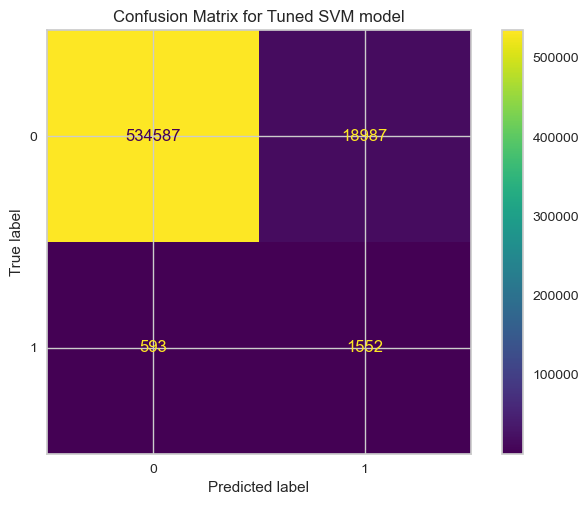

In [154]:
tuned_svm_cm = confusion_matrix(y_test, tuned_svm_pred)
display = ConfusionMatrixDisplay(tuned_svm_cm).plot()
plt.title("Confusion Matrix for Tuned SVM model")
plt.show()

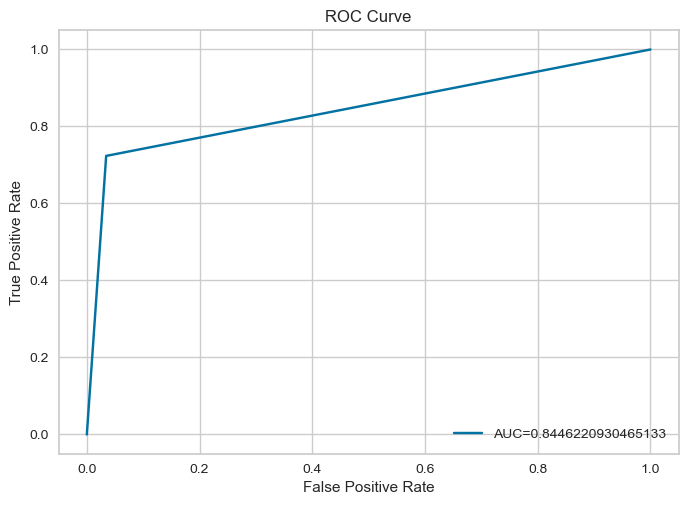

In [155]:
ROC_curve(y_test,tuned_svm_pred)

### GaussianNB

####Baseline

In [156]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_pred = NB_model.predict(X_test)

In [157]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {NB_model.score(X_train, y_train)*100:.3f} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {NB_model.score(X_test, y_test)*100:.3f} %')

Training Accuracy	: 84.626 %
Testing Accuracy	:  95.015 %


In [158]:
print(classification_report(y_test, NB_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.73      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.84      0.54    555719
weighted avg       1.00      0.95      0.97    555719



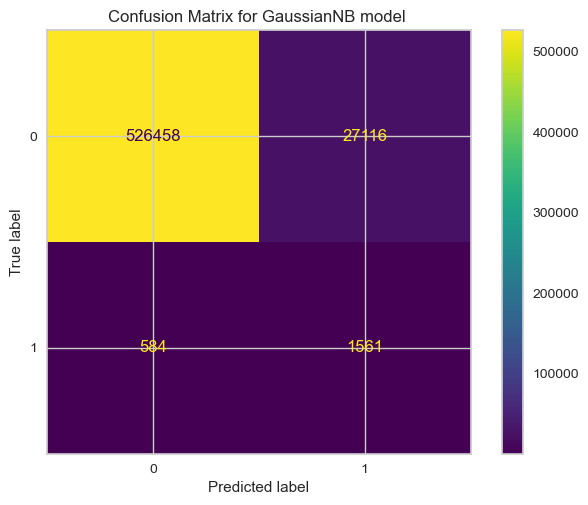

In [159]:
NB_cm = confusion_matrix(y_test, NB_pred)
display = ConfusionMatrixDisplay(NB_cm).plot()
plt.title(f"Confusion Matrix for GaussianNB model ")
plt.show()

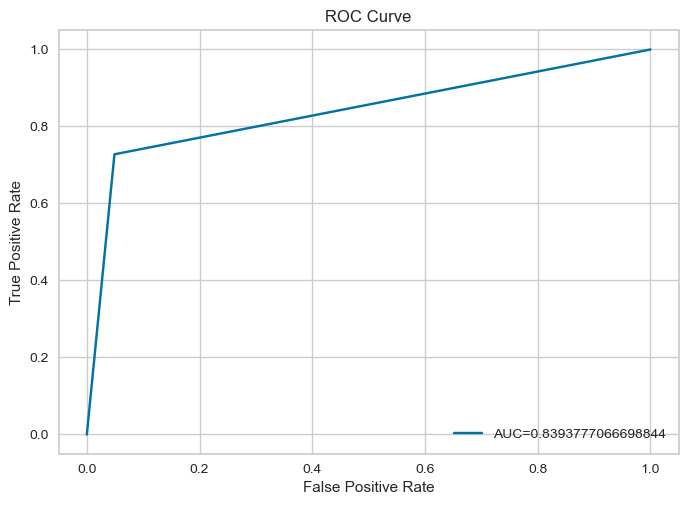

In [160]:
ROC_curve(y_test,NB_pred) #Area under Curve  to evaluate the quality of GaussianNB model

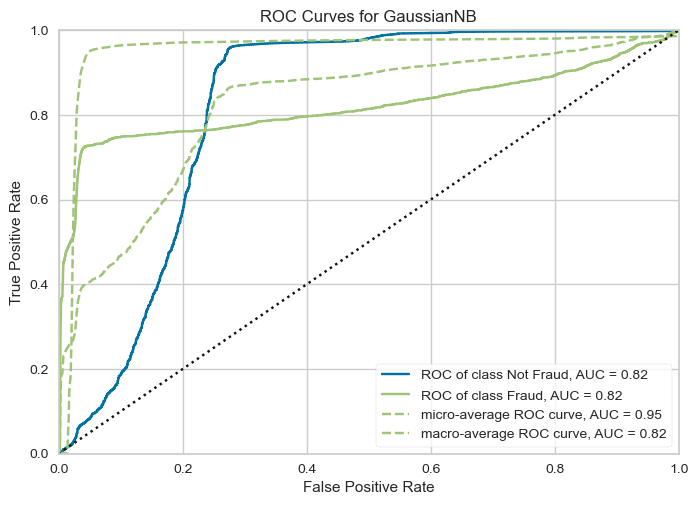

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [161]:
visualizer = ROCAUC(NB_model, classes=["Not Fraud", "Fraud"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [162]:
Accuracy['GaussianNB']=accuracy_score(y_test,NB_pred)
Precision['GaussianNB']=precision_score(y_test,NB_pred)
Recall['GaussianNB']=recall_score(y_test,NB_pred)
F1_score['GaussianNB']=f1_score(y_test,NB_pred)
models.append(NB_model)

####Gridesearch

In [163]:
cv_nb = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

NB_params = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

NB_grid = GridSearchCV(estimator=NB_model, 
                 param_grid=NB_params, 
                 cv=cv_nb,   
                 scoring='recall') 
NB_grid.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             scoring='recall')

In [164]:
# summarize
print('Mean Accuracy: %.3f' % NB_grid.best_score_)
print('Best parameters: %s' % NB_grid.best_params_)

Mean Accuracy: 0.743
Best parameters: {'var_smoothing': 1e-06}


In [165]:
NB_results = pd.DataFrame(NB_grid.cv_results_['params'])
NB_results['test_score'] = NB_grid.cv_results_['mean_test_score']

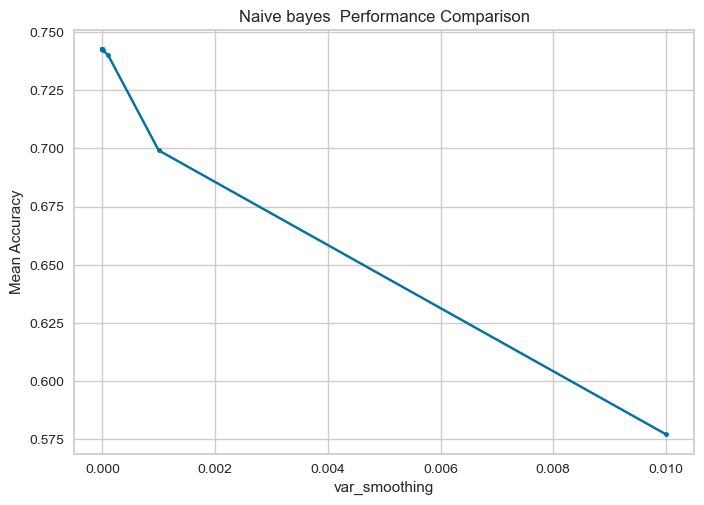

In [166]:
plt.plot(NB_results['var_smoothing'], NB_results['test_score'], marker = '.')    
plt.xlabel('var_smoothing')
plt.ylabel("Mean Accuracy")
plt.title("Naive bayes  Performance Comparison")
plt.show()

####Tuned Naive Bayes

In [167]:
tuned_NB_model = GaussianNB(var_smoothing=0.0001)
tuned_NB_model.fit(X_train, y_train)
tuned_NB_pred = tuned_NB_model.predict(X_test)

In [168]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {tuned_NB_model.score(X_train, y_train)*100:.3f} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {tuned_NB_model.score(X_test, y_test)*100:.3f} %')

Training Accuracy	: 84.772 %
Testing Accuracy	:  95.493 %


In [169]:
print(classification_report(y_test, tuned_NB_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.06      0.73      0.11      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.84      0.54    555719
weighted avg       1.00      0.95      0.97    555719



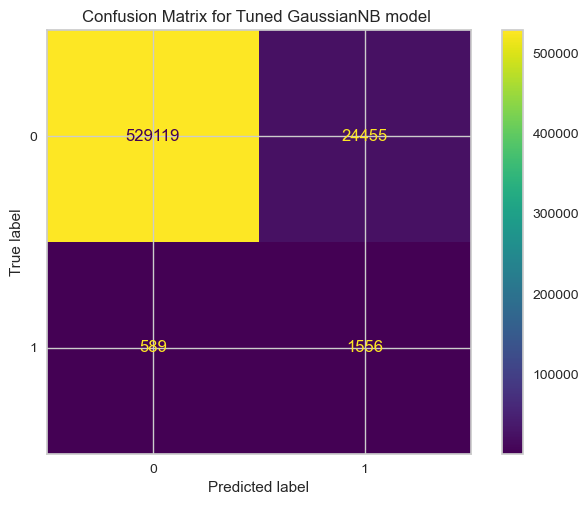

In [170]:
tuned_NB_cm = confusion_matrix(y_test, tuned_NB_pred)
display = ConfusionMatrixDisplay(tuned_NB_cm).plot()
plt.title(f"Confusion Matrix for Tuned GaussianNB model ")
plt.show()

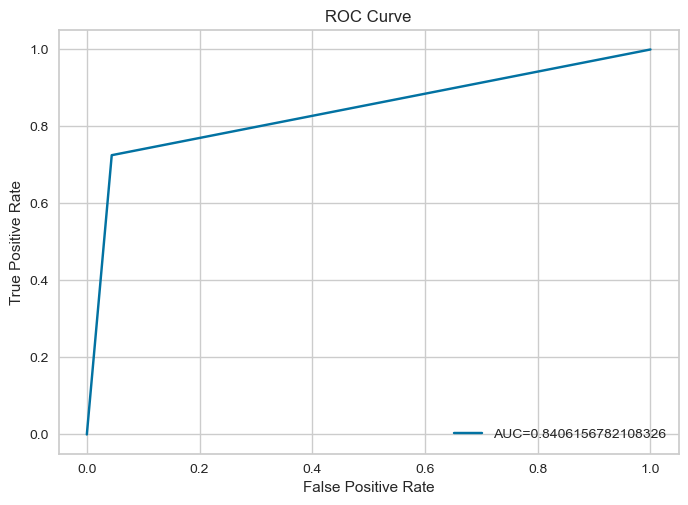

In [171]:
ROC_curve(y_test,tuned_NB_pred) #Area under Curve  to evaluate the quality of GaussianNB model

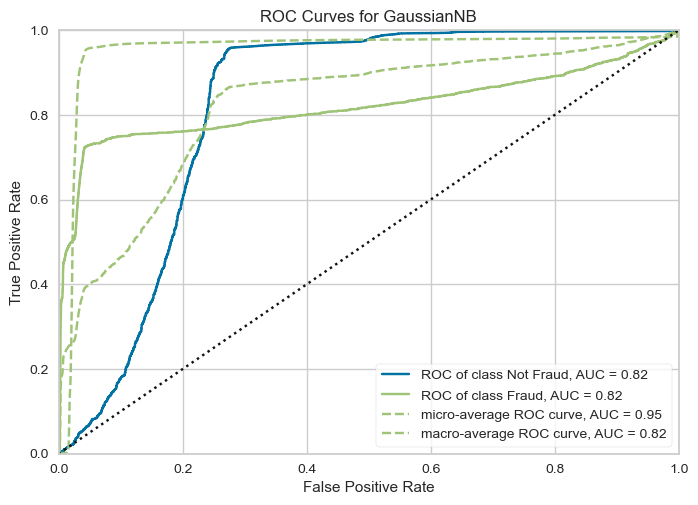

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [172]:
visualizer = ROCAUC(tuned_NB_model, classes=["Not Fraud", "Fraud"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### Decision Tree

####Basline

In [173]:
from sklearn.tree import DecisionTreeClassifier

In [174]:
DT_model =  DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
DT_pred = DT_model.predict(X_test)

In [175]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {DT_model.score(X_train, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {DT_model.score(X_test, y_test)*100} %')

Training Accuracy	: 100.0 %
Testing Accuracy	:  92.27181363242934 %


In [176]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.04      0.91      0.08      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.92      0.52    555719
weighted avg       1.00      0.92      0.96    555719



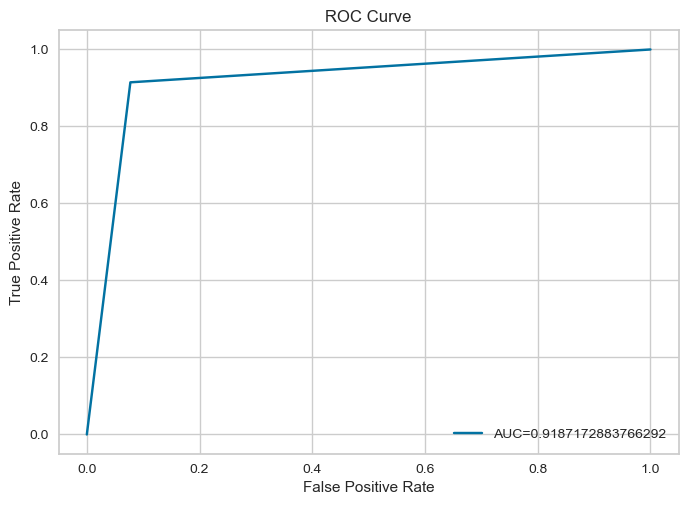

In [177]:
ROC_curve(y_test,DT_pred)#Area under Curve  to evaluate the quality of DT model AUC=80.95

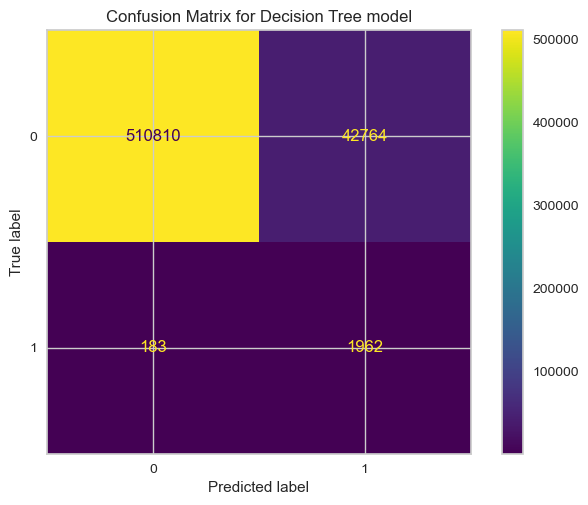

In [178]:
DT_cm = confusion_matrix(y_test, DT_pred)
display = ConfusionMatrixDisplay(DT_cm).plot()
plt.title(f"Confusion Matrix for Decision Tree model")
plt.show()

In [179]:
Accuracy['Decision Tree']=accuracy_score(y_test,DT_pred)
Precision['Decision Tree']=precision_score(y_test,DT_pred)
Recall['Decision Tree']=recall_score(y_test,DT_pred)
F1_score['Decision Tree']=f1_score(y_test,DT_pred)
models.append(DT_model)

####GrideSearch

In [180]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
DT_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
DT_grid = GridSearchCV(DT_model, tree_para, cv=DT_cv,scoring='recall')
DT_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='recall')

In [181]:
# summarize
print('Mean Accuracy: %.3f' % DT_grid.best_score_)
print('parameters: %s' % DT_grid.best_params_)

Mean Accuracy: 0.959
parameters: {'criterion': 'gini', 'max_depth': 8}


####Tuned Decision Tree

In [182]:
Tuned_DT_model =  DecisionTreeClassifier(criterion='gini',max_depth=10)
Tuned_DT_model.fit(X_train, y_train)
DT_tuned_pred = Tuned_DT_model.predict(X_test)

In [183]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {Tuned_DT_model.score(X_train, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {Tuned_DT_model.score(X_test, y_test)*100} %')

Training Accuracy	: 97.10231814548361 %
Testing Accuracy	:  91.71271811832959 %


In [184]:
print(classification_report(y_test, DT_tuned_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.04      0.94      0.08      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.93      0.52    555719
weighted avg       1.00      0.92      0.95    555719



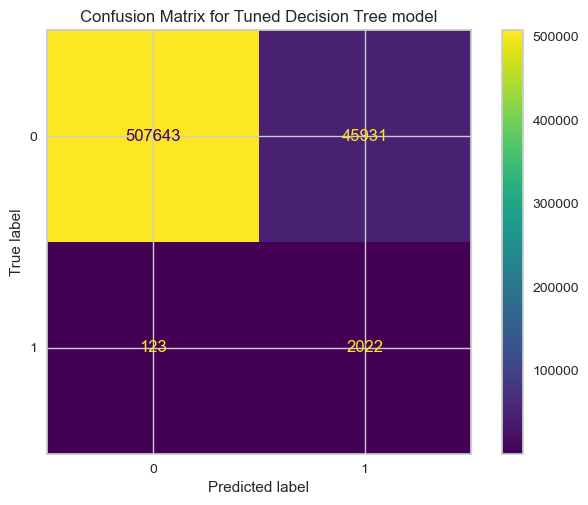

In [185]:
DT_tuned_cm = confusion_matrix(y_test, DT_tuned_pred)
display = ConfusionMatrixDisplay(DT_tuned_cm).plot()
plt.title(f"Confusion Matrix for Tuned Decision Tree model")
plt.show()

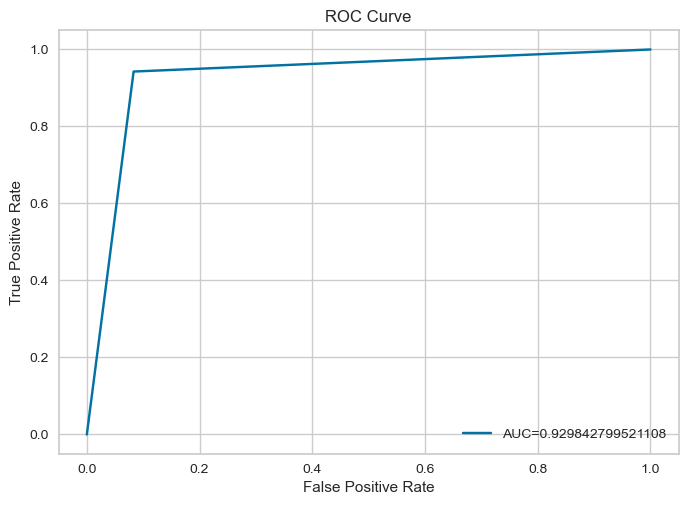

In [186]:
ROC_curve(y_test, DT_tuned_pred)

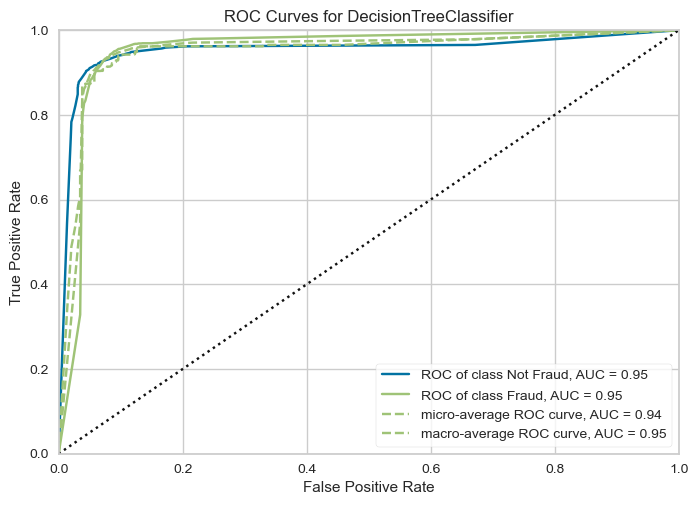

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [187]:
visualizer = ROCAUC(Tuned_DT_model, classes=["Not Fraud", "Fraud"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### SGD Classifier

####Basline

In [188]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

In [189]:
#class_weight='balanced', penalty='l2', alpha=0.0001, max_iter=50, loss='log'

In [190]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_pred=sgd_model.predict(X_test)

In [191]:
#Scoring the model on training_data
print(f'Training Accuracy\t: {sgd_model.score(X_train, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {sgd_model.score(X_test, y_test)*100} %')

Training Accuracy	: 81.9078070876632 %
Testing Accuracy	:  90.66398665512607 %


In [192]:
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    553574
           1       0.03      0.72      0.06      2145

    accuracy                           0.91    555719
   macro avg       0.51      0.81      0.50    555719
weighted avg       1.00      0.91      0.95    555719



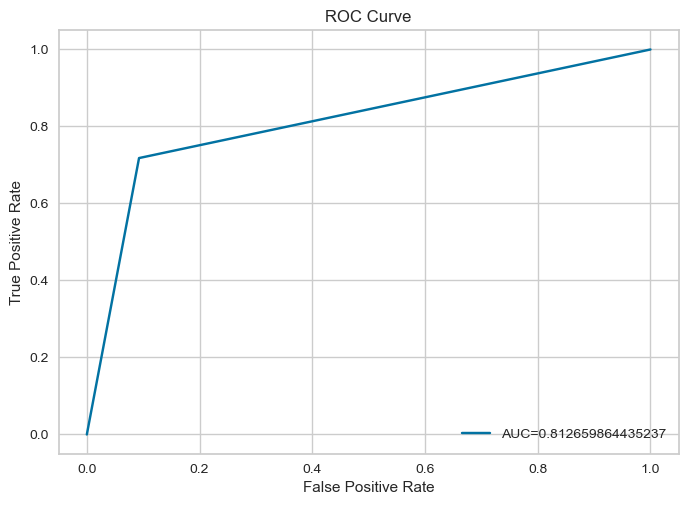

In [193]:
ROC_curve(y_test,sgd_pred)

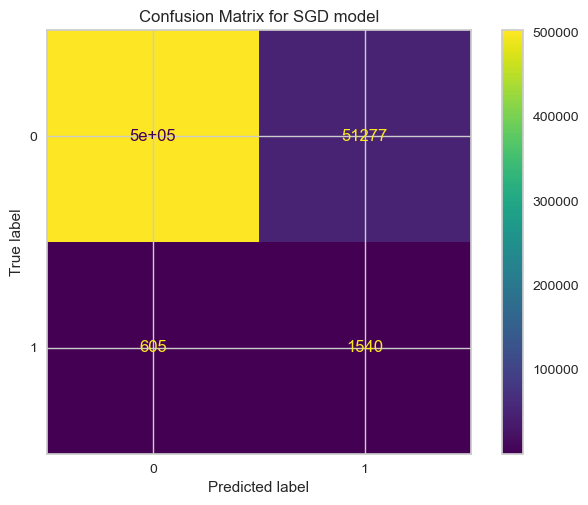

In [194]:
SGD_cm = confusion_matrix(y_test, sgd_pred)
display = ConfusionMatrixDisplay(SGD_cm).plot()
plt.title(f"Confusion Matrix for SGD model")
plt.show()

In [195]:
Accuracy['SGD classifier']=accuracy_score(y_test,sgd_pred)
Precision['SGD classifier']=precision_score(y_test,sgd_pred)
Recall['SGD classifier']=recall_score(y_test,sgd_pred)
F1_score['SGD classifier']=f1_score(y_test,sgd_pred)
models.append(sgd_model)

####Gridesearch

In [196]:
def show_params(searcher, grid_param_1, grid_param_2, name_param_1, name_param_2, rot=0):
    scores_mean = searcher.cv_results_['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1), len(grid_param_2)).T

    print('Best params = {}'.format(searcher.best_params_))
    print('Best score = {}'.format(scores_mean.max()))

    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx, :], '-o', label=name_param_2 + ': ' + str(val))

    ax.tick_params(axis='x', rotation=rot)
    ax.set_title('Grid Search Scores')
    ax.set_xlabel(name_param_1)
    ax.set_ylabel('CV score')
    ax.legend(loc='best')
    ax.grid('on')

In [197]:
grid_params_1 = ['hinge', 'log', 'modified_huber', 'perceptron', 'huber', 'epsilon_insensitive']
grid_params_2 = ['l2', 'l1', 'elasticnet']
sgd_grid = GridSearchCV(SGDClassifier(max_iter=1000), param_grid = {'loss': grid_params_1,'penalty': grid_params_2},scoring='recall')
sgd_grid.fit(X_train, y_train)

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173:

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'log', 'modified_huber',
                                  'perceptron', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='recall')

In [198]:
# summarize
print('Mean Accuracy: %.3f' % sgd_grid.best_score_)
print('parameters: %s' % sgd_grid.best_params_)

Mean Accuracy: 0.769
parameters: {'loss': 'perceptron', 'penalty': 'elasticnet'}


Best params = {'loss': 'perceptron', 'penalty': 'elasticnet'}
Best score = 0.7692559154970809


array([0.60949221, 0.74926773, 0.72928079, 0.66718637, 0.74034133,
       0.7240855 , 0.72528079, 0.71235874, 0.70102435, 0.72126598,
       0.74351879, 0.76925592, 0.70237507, 0.72688452, 0.72182265,
       0.69024166, 0.73634426, 0.54647146])

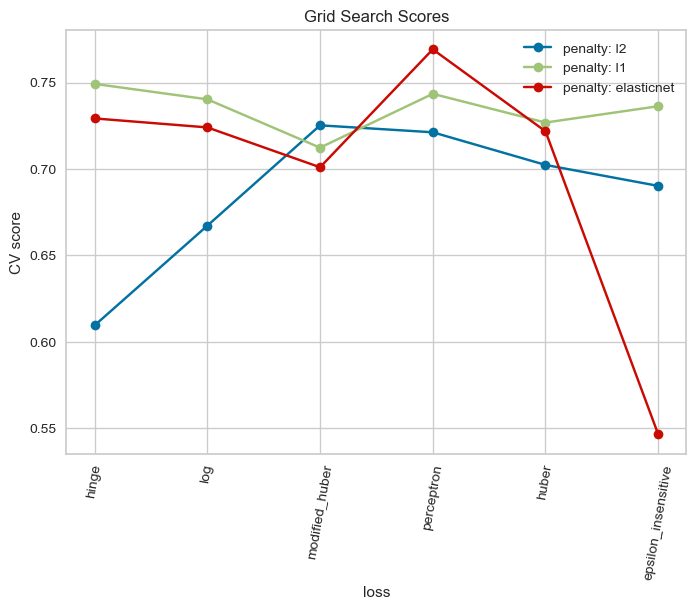

In [199]:
show_params(sgd_grid, grid_params_1, grid_params_2, 'loss', 'penalty', 80)
sgd_grid.cv_results_['mean_test_score']

####Tuned SGD

In [200]:
tuned_SGD_model = SGDClassifier(loss='log', penalty='l2')
tuned_SGD_model.fit(X_train, y_train)
SGD_tuned_pred = sgd_grid.predict(X_test)

C:\Users\hrelh\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



In [201]:
print(f'Training Accuracy\t: {tuned_SGD_model.score(X_train, y_train)*100} %')

#Scoring the model on test_data
print(f'Testing Accuracy\t:  {tuned_SGD_model.score(X_test, y_test)*100} %')

Training Accuracy	: 78.49720223820943 %
Testing Accuracy	:  88.7608665530601 %


In [202]:
print(classification_report(y_test, SGD_tuned_pred)) #get the evalutions matrices for  LR

              precision    recall  f1-score   support

           0       1.00      0.69      0.81    553574
           1       0.01      0.78      0.02      2145

    accuracy                           0.69    555719
   macro avg       0.50      0.73      0.42    555719
weighted avg       0.99      0.69      0.81    555719



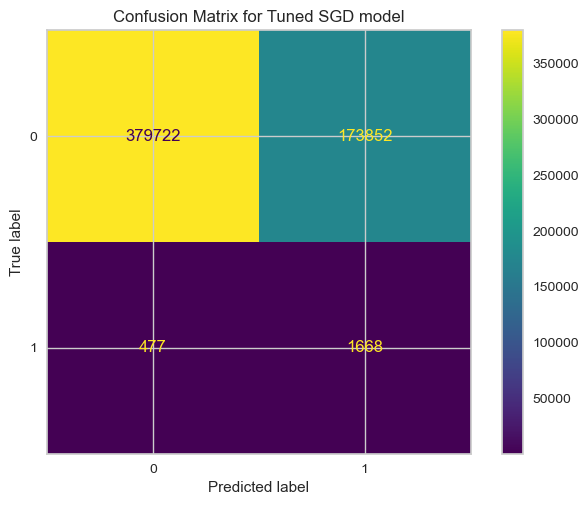

In [203]:
sgt_tuned_cm = confusion_matrix(y_test, SGD_tuned_pred)
display = ConfusionMatrixDisplay(sgt_tuned_cm).plot()
plt.title("Confusion Matrix for Tuned SGD model")
plt.show()

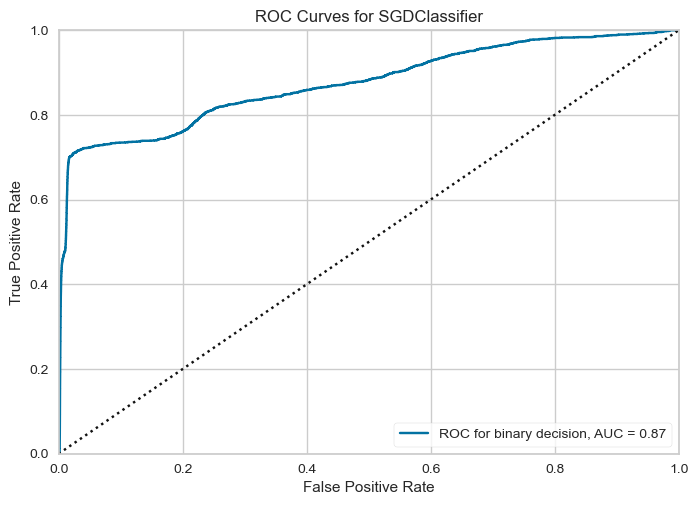

<AxesSubplot:title={'center':'ROC Curves for SGDClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [204]:
viz = ROCAUC(tuned_SGD_model, micro=False, macro=False, per_class=False)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

### The Champoin Model

In [205]:
df_model = pd.DataFrame(index=['Logistic Regression','SVM','Gaussian NB','Decision Tree','SGD classifier'],
                        columns=['Accuracy', 'Precision', 'Recall','F1_Score'])
df_model['Accuracy'] = Accuracy.values()
df_model['Precision'] = Precision.values()
df_model['Recall'] = Recall.values()
df_model['F1_Score'] = F1_score.values()
df_model["roc_auc_score"] = [metrics.roc_auc_score(y_original_test, LR_y_pred),
                            metrics.roc_auc_score(y_original_test, svm_pred),
                            metrics.roc_auc_score(y_original_test, NB_pred),
                            metrics.roc_auc_score(y_original_test, DT_pred),
                            metrics.roc_auc_score(y_original_test, SGD_tuned_pred)]

df_model

Accuracy  Precision    Recall  F1_Score  roc_auc_score
Logistic Regression  0.964387   0.074795  0.723543  0.135575       0.856756
SVM                  0.964766   0.075564  0.723543  0.136837       0.844622
Gaussian NB          0.950155   0.054434  0.727739  0.101291       0.839378
Decision Tree        0.922718   0.043867  0.914685  0.083719       0.918717
SGD classifier       0.906640   0.029157  0.717949  0.056039       0.731784

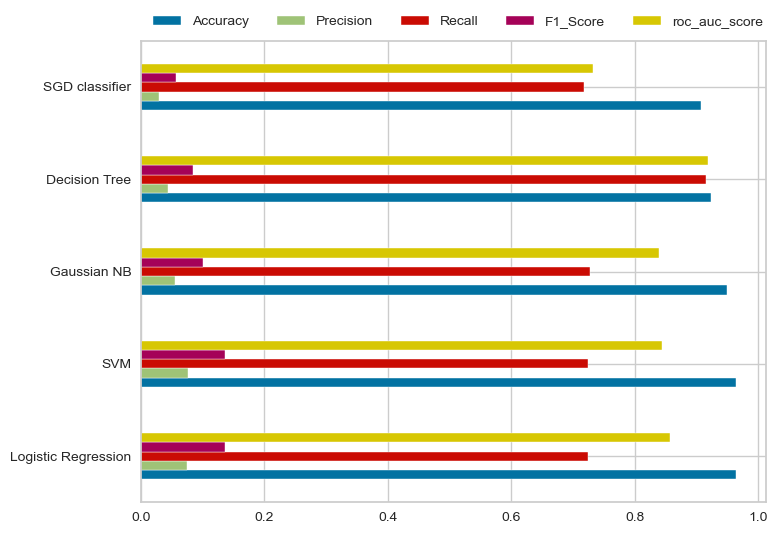

In [206]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(['Logistic Regression','SVM','Gaussian NB','Decision Tree','SGD classifier']), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10}
)
plt.tight_layout()

## Ensemble Techniques

### Random Forest Classifier

In [207]:
# initializa model
rf_clf = RandomForestClassifier(random_state=42)

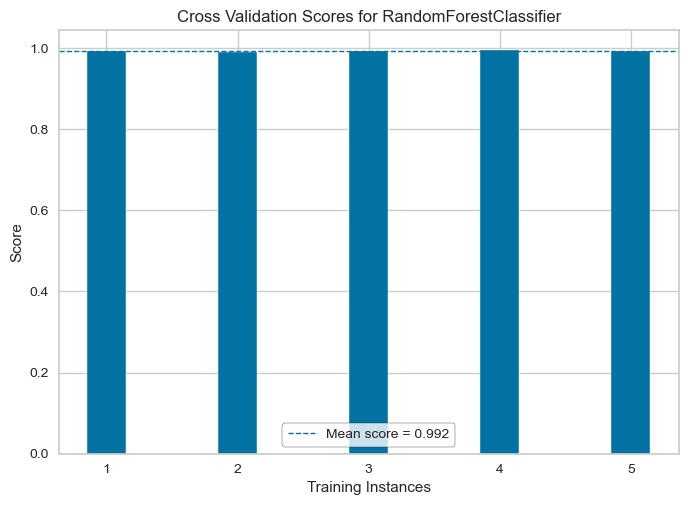

<AxesSubplot:title={'center':'Cross Validation Scores for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [208]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
visualizer = CVScores(rf_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

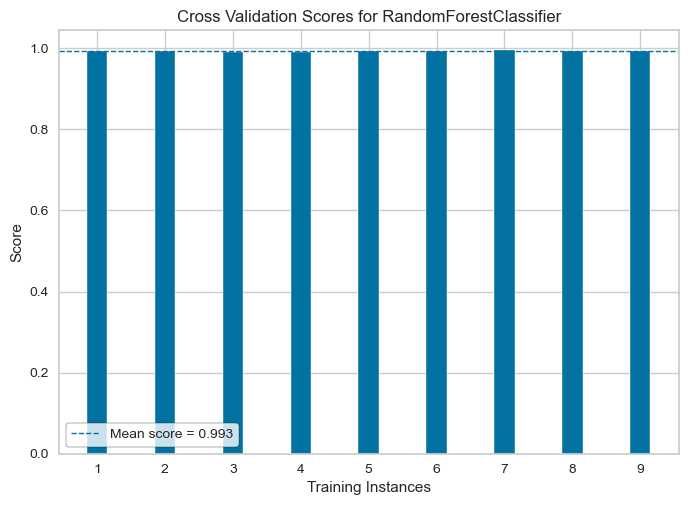

<AxesSubplot:title={'center':'Cross Validation Scores for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [209]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
visualizer = CVScores(rf_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

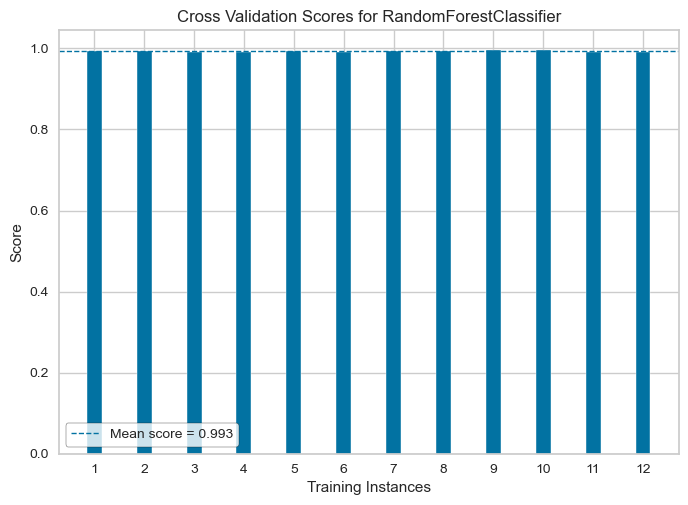

<AxesSubplot:title={'center':'Cross Validation Scores for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [210]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=12, shuffle=True, random_state=42)
visualizer = CVScores(rf_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [211]:
# fit the model model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [212]:
# predict x test
rf_clf_y_pred = rf_clf.predict(X_test)

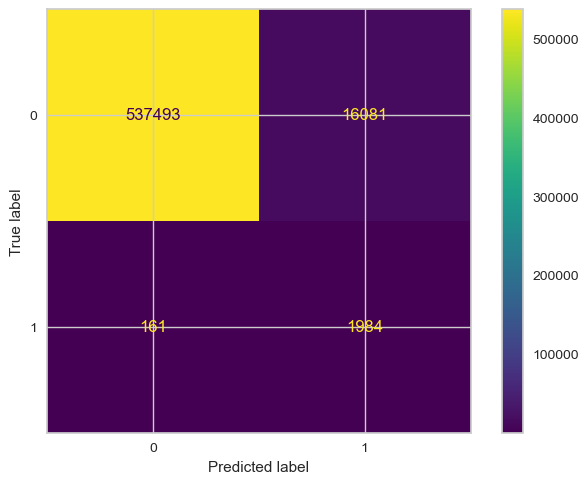

In [213]:
# plot Confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, rf_clf_y_pred)

In [214]:
# print classification report
print(metrics.classification_report(y_test, rf_clf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.11      0.92      0.20      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.95      0.59    555719
weighted avg       1.00      0.97      0.98    555719



In [215]:
# get roc_auc score
rf_clf_roc_auc_score = metrics.roc_auc_score(y_test, rf_clf_y_pred)
print("Random Forest Roc_AUC Score Is {}".format(rf_clf_roc_auc_score))

Random Forest Roc_AUC Score Is 0.9479461557469195


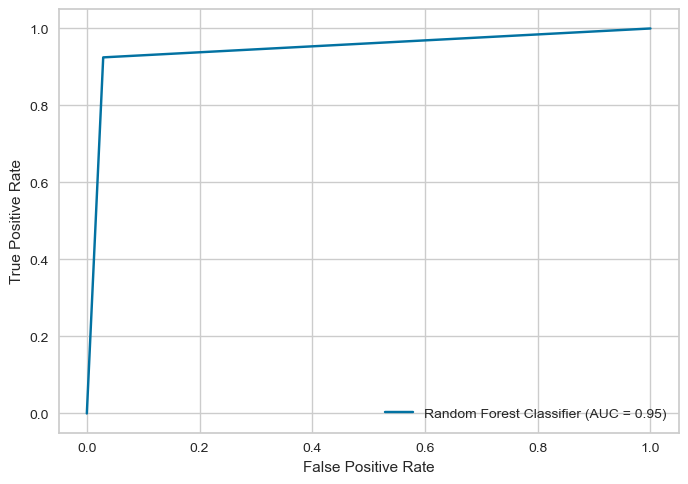

In [216]:
plot_roc_auc_curve(rf_clf_y_pred, "Random Forest Classifier")

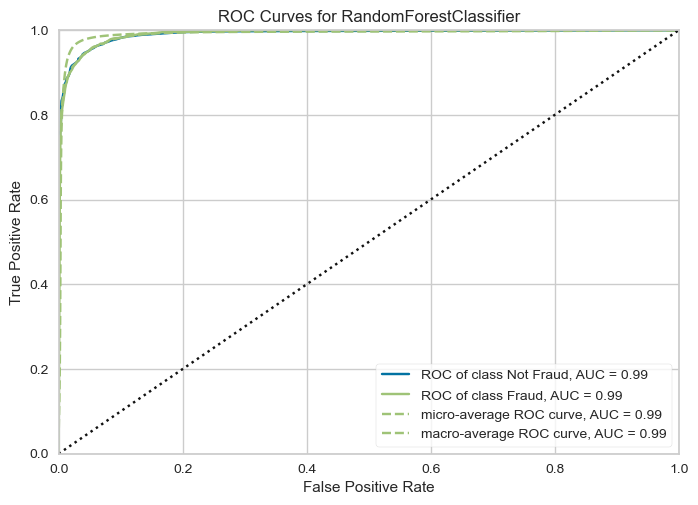

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [217]:
visualizer = ROCAUC(rf_clf, classes=["Not Fraud", "Fraud"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### ExtraTreesClassifier

In [218]:
# initializa model
extra_trees_clf = ExtraTreesClassifier(random_state=42)

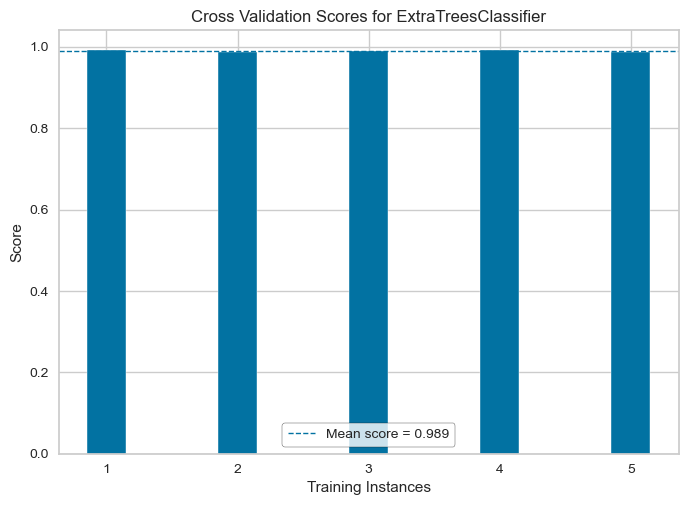

<AxesSubplot:title={'center':'Cross Validation Scores for ExtraTreesClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [219]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
visualizer = CVScores(extra_trees_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

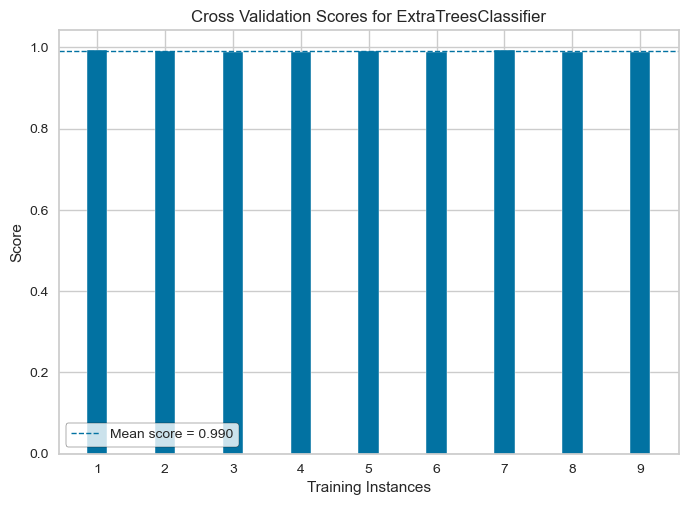

<AxesSubplot:title={'center':'Cross Validation Scores for ExtraTreesClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [220]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
visualizer = CVScores(extra_trees_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

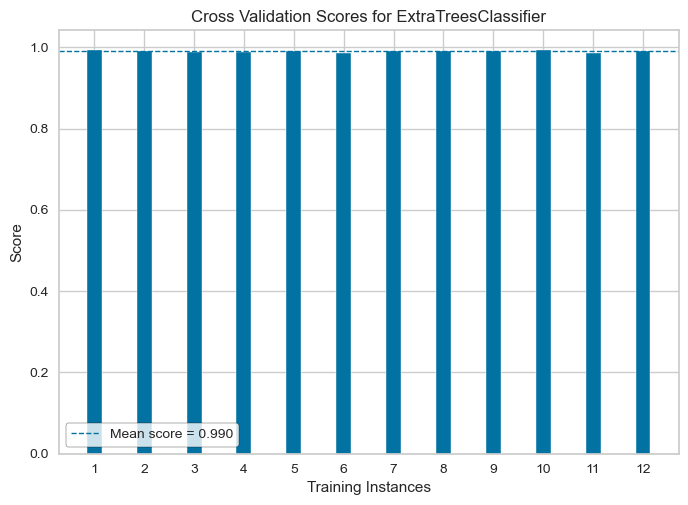

<AxesSubplot:title={'center':'Cross Validation Scores for ExtraTreesClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [221]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=12, shuffle=True, random_state=42)
visualizer = CVScores(extra_trees_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [222]:
# fit the model model
extra_trees_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [223]:
# predict x test
extra_tress_clf_y_pred = extra_trees_clf.predict(X_test)

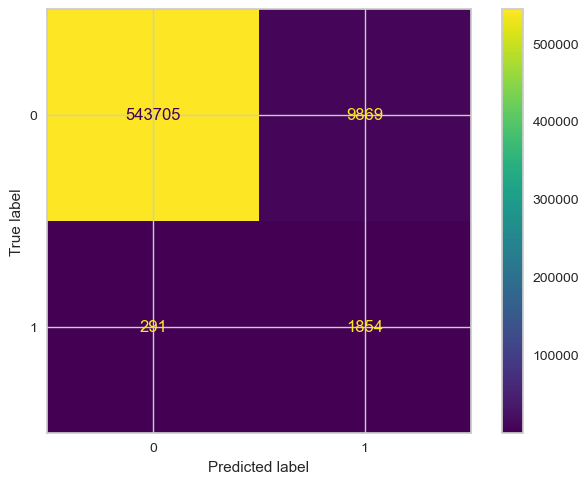

In [224]:
# plot Confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, extra_tress_clf_y_pred)

In [225]:
# print classification report
print(metrics.classification_report(y_test, extra_tress_clf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.16      0.86      0.27      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.92      0.63    555719
weighted avg       1.00      0.98      0.99    555719



In [226]:
# get roc_auc score
extra_trees_clf_roc_auc_score = metrics.roc_auc_score(y_test, extra_tress_clf_y_pred)
print("Extra Trees Roc_AUC Score Is {}".format(extra_trees_clf_roc_auc_score))

Extra Trees Roc_AUC Score Is 0.923253938090437


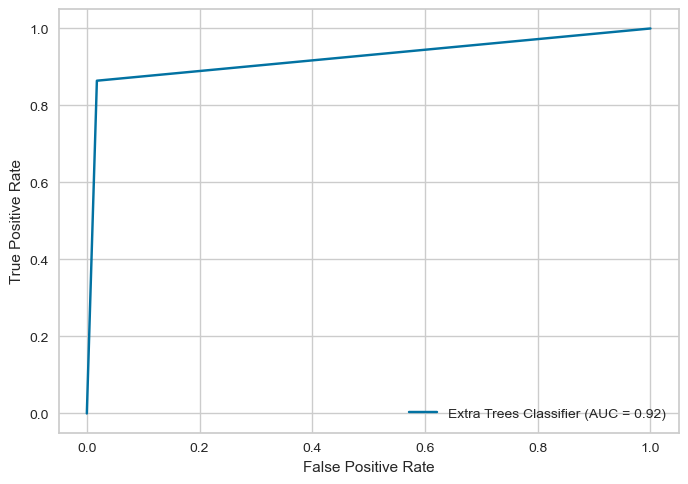

In [227]:
plot_roc_auc_curve(extra_tress_clf_y_pred, "Extra Trees Classifier")

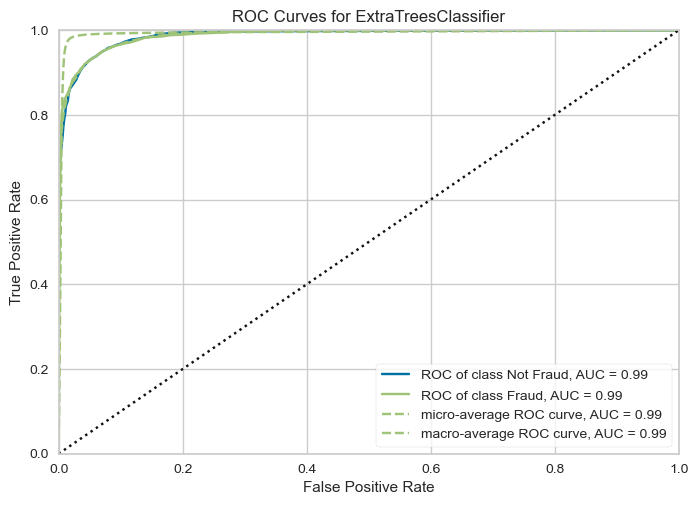

<AxesSubplot:title={'center':'ROC Curves for ExtraTreesClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [228]:
visualizer = ROCAUC(extra_trees_clf, classes=["Not Fraud", "Fraud"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### XGBoost Classifier

In [229]:
# initializa model
xgb_clf = XGBClassifier(random_state=42)

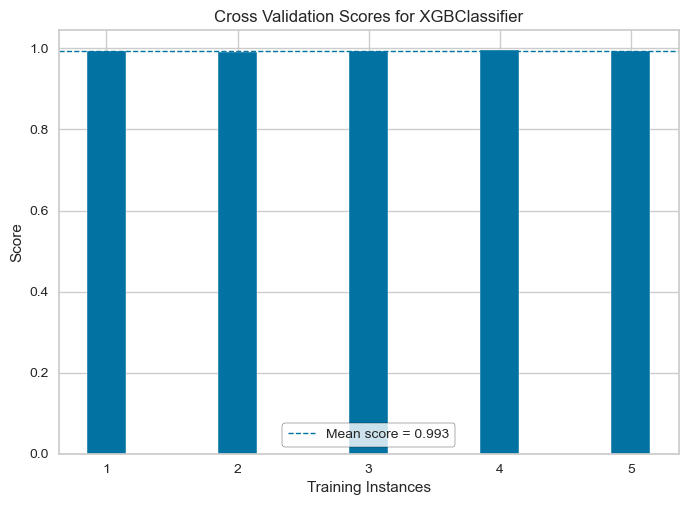

<AxesSubplot:title={'center':'Cross Validation Scores for XGBClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [230]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
visualizer = CVScores(xgb_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

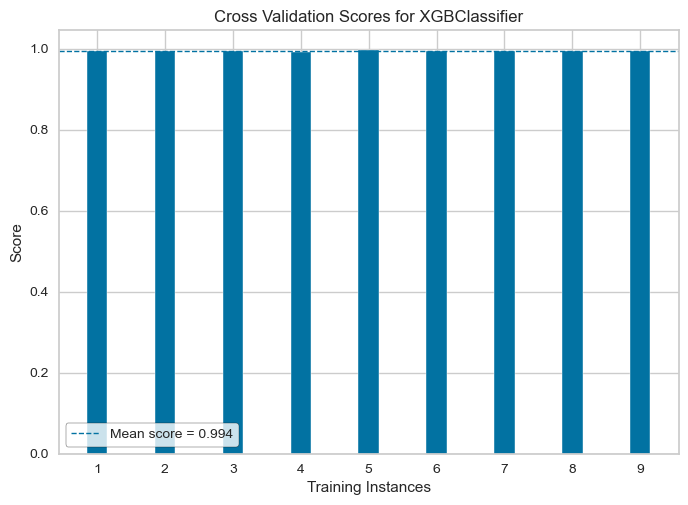

<AxesSubplot:title={'center':'Cross Validation Scores for XGBClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [231]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
visualizer = CVScores(xgb_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

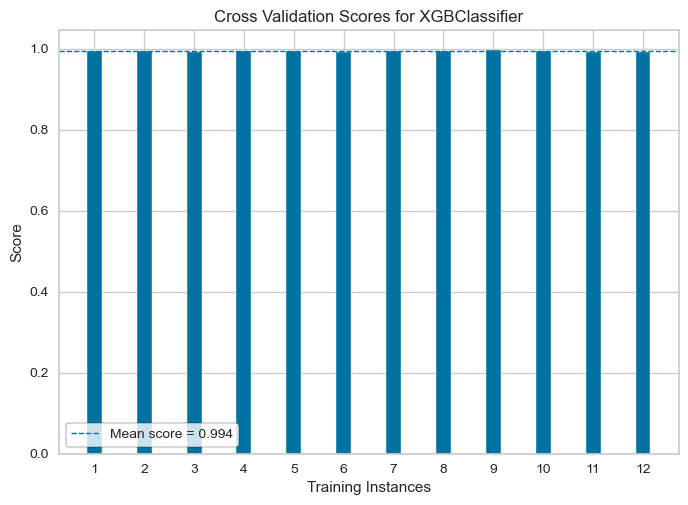

<AxesSubplot:title={'center':'Cross Validation Scores for XGBClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [232]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=12, shuffle=True, random_state=42)
visualizer = CVScores(xgb_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [233]:
# fit the model model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [234]:
# predict x test
xgb_clf_y_pred = xgb_clf.predict(X_test)

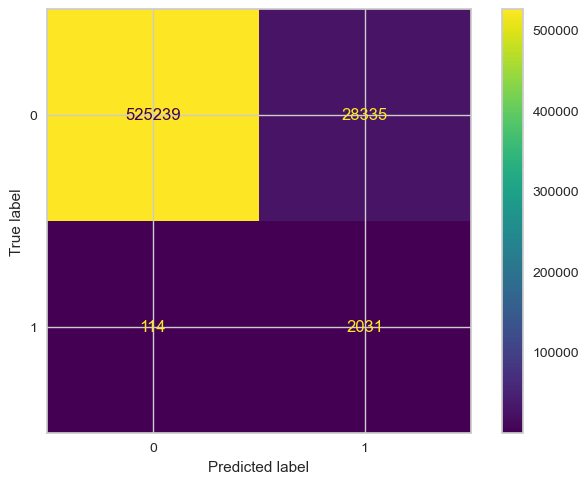

In [235]:
# plot Confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, xgb_clf_y_pred)

In [236]:
# print classification report
print(metrics.classification_report(y_test, xgb_clf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.07      0.95      0.12      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.95      0.55    555719
weighted avg       1.00      0.95      0.97    555719



In [237]:
# get roc_auc score
xgb_clf_roc_auc_score = metrics.roc_auc_score(y_test, xgb_clf_y_pred)
print("XGBoost Classifier Roc_AUC Score Is {}".format(xgb_clf_roc_auc_score))

XGBoost Classifier Roc_AUC Score Is 0.9478337890833782


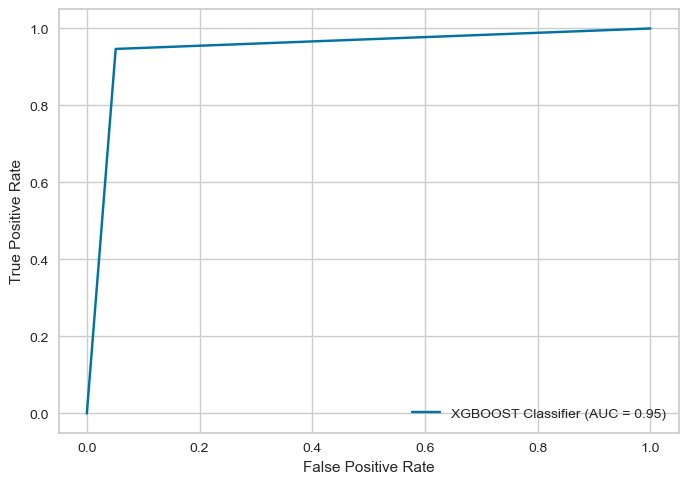

In [238]:
plot_roc_auc_curve(xgb_clf_y_pred, "XGBOOST Classifier")

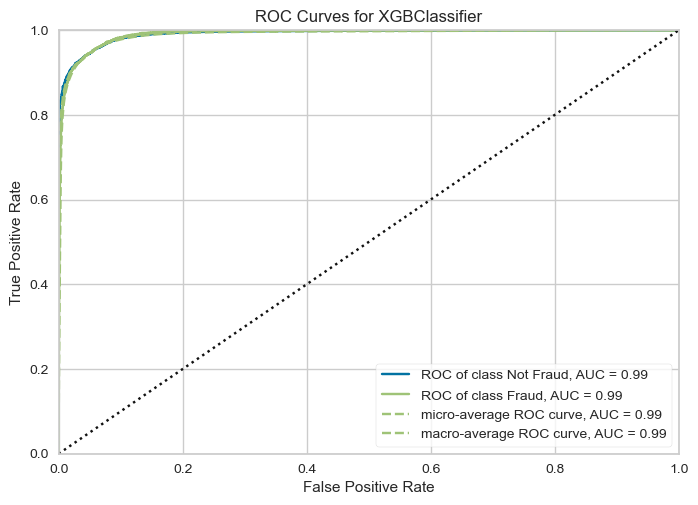

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [239]:
visualizer = ROCAUC(xgb_clf, classes=["Not Fraud", "Fraud"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### LGBMClassifier

In [240]:
# initializa model
lgbm_clf = LGBMClassifier(random_state=42)

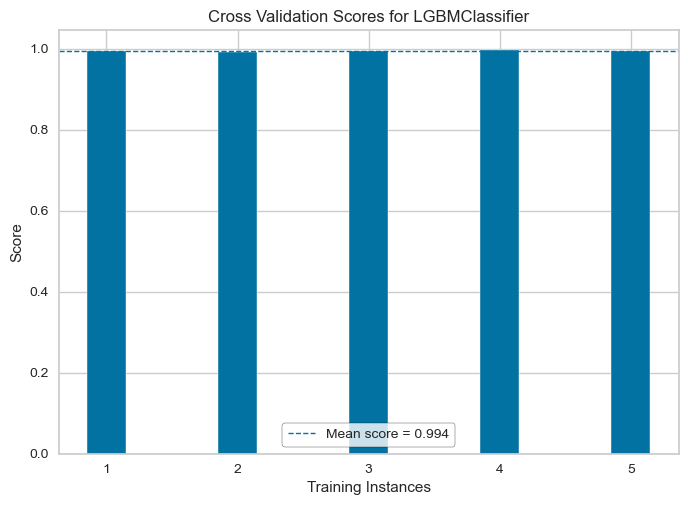

<AxesSubplot:title={'center':'Cross Validation Scores for LGBMClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [241]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
visualizer = CVScores(lgbm_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

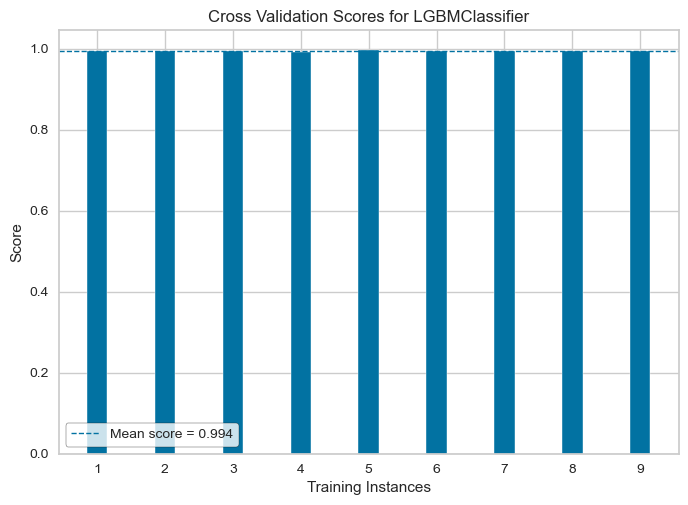

<AxesSubplot:title={'center':'Cross Validation Scores for LGBMClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [242]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
visualizer = CVScores(lgbm_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

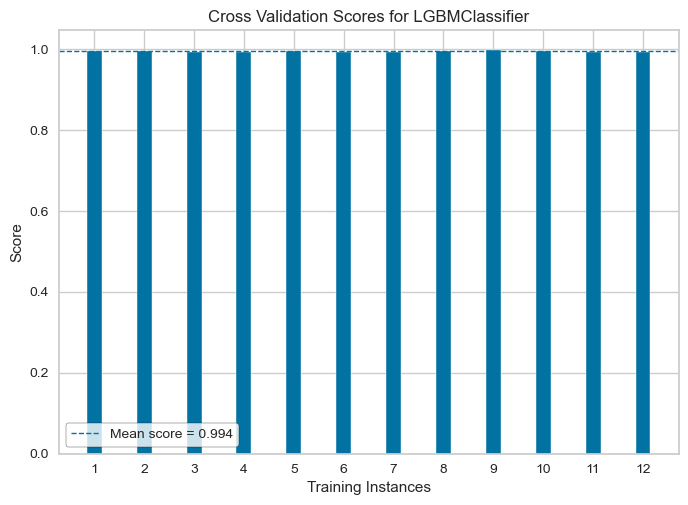

<AxesSubplot:title={'center':'Cross Validation Scores for LGBMClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [243]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=12, shuffle=True, random_state=42)
visualizer = CVScores(lgbm_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [244]:
# fit the model model
lgbm_clf.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [245]:
# predict x test
lgbm_clf_y_pred = lgbm_clf.predict(X_test)

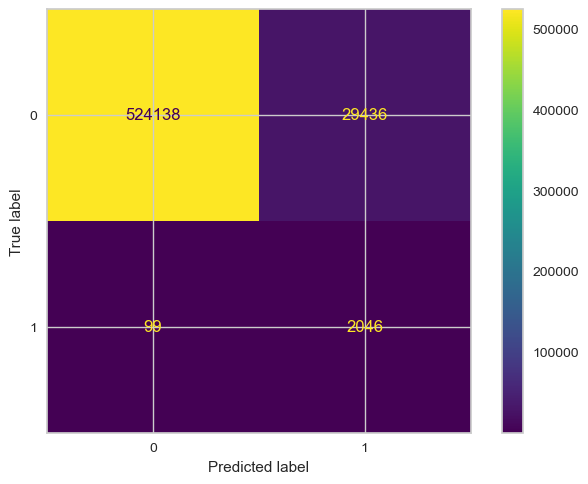

In [246]:
# plot Confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, lgbm_clf_y_pred)

In [247]:
# print classification report
print(metrics.classification_report(y_test, lgbm_clf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.95      0.12      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.95      0.55    555719
weighted avg       1.00      0.95      0.97    555719



In [248]:
# get roc_auc score
lgbm_clf_roc_auc_score = metrics.roc_auc_score(y_test, lgbm_clf_y_pred)
print("LGBMClassifier Roc_AUC Score Is {}".format(lgbm_clf_roc_auc_score))

LGBMClassifier Roc_AUC Score Is 0.9503358455863452


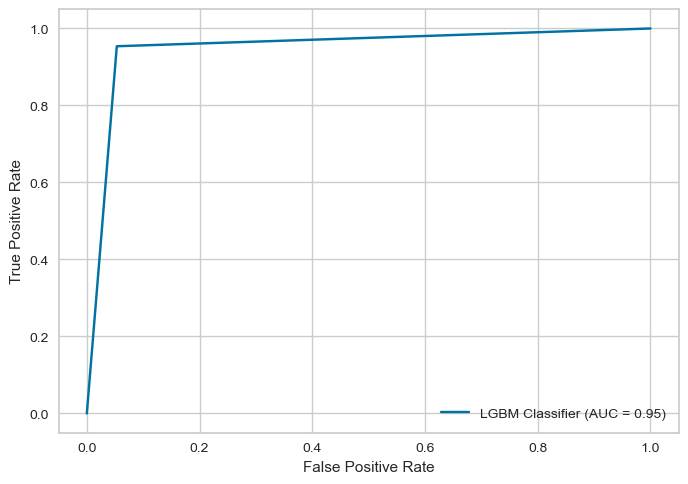

In [249]:
plot_roc_auc_curve(lgbm_clf_y_pred, "LGBM Classifier")

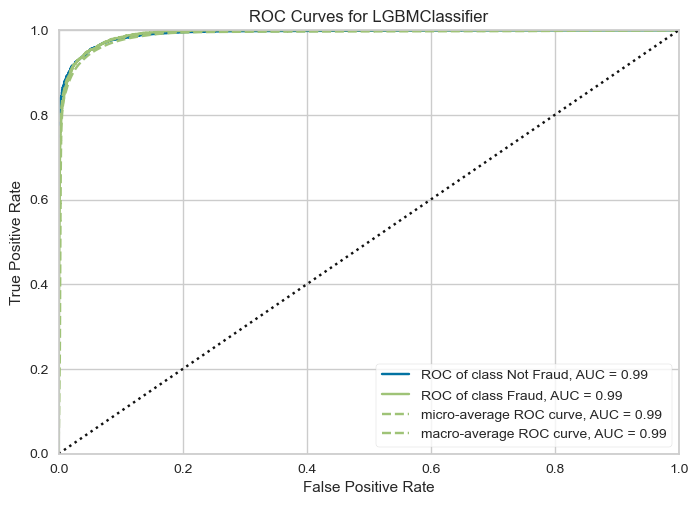

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [250]:
visualizer = ROCAUC(lgbm_clf, classes=["Not Fraud", "Fraud"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### HistGradientBoostingClassifier

In [251]:
# initializa model
hist_clf = HistGradientBoostingClassifier(random_state=42)

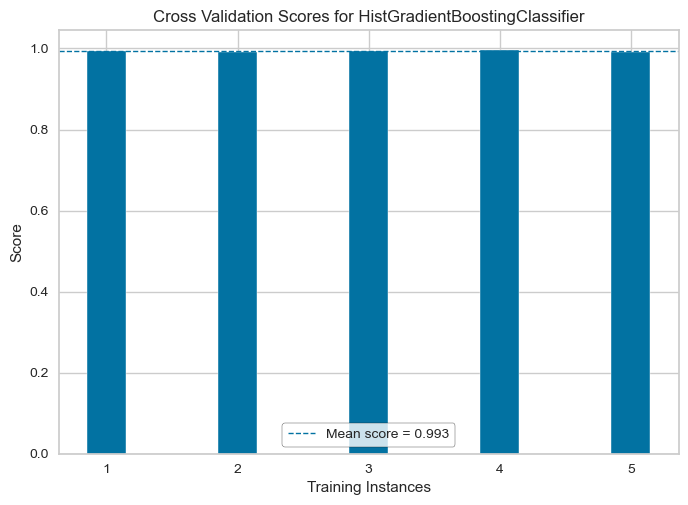

<AxesSubplot:title={'center':'Cross Validation Scores for HistGradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [252]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
visualizer = CVScores(hist_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

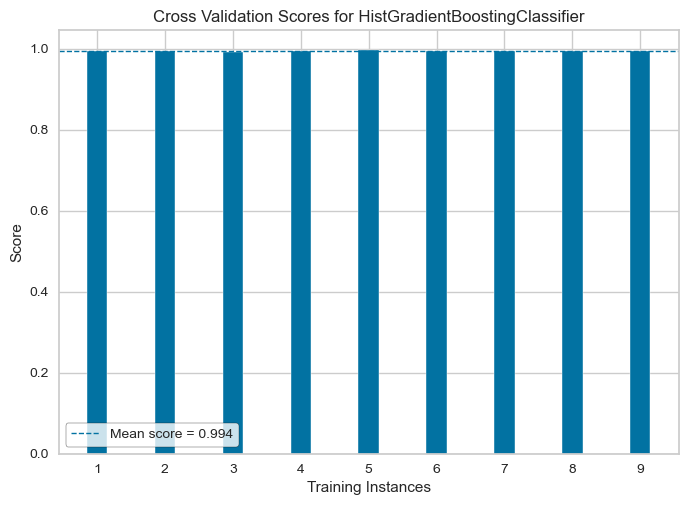

<AxesSubplot:title={'center':'Cross Validation Scores for HistGradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [253]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
visualizer = CVScores(hist_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

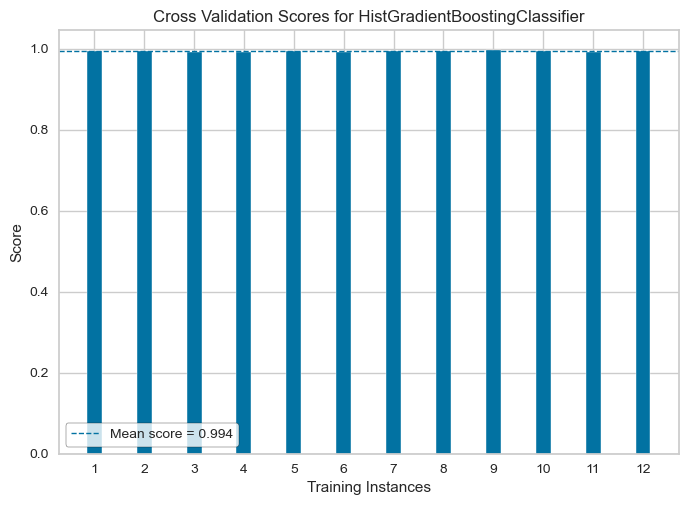

<AxesSubplot:title={'center':'Cross Validation Scores for HistGradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [254]:
# yelowbrick cvscores
cv = StratifiedKFold(n_splits=12, shuffle=True, random_state=42)
visualizer = CVScores(hist_clf, cv=cv, scoring='roc_auc')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [255]:
# fit the model model
hist_clf.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [256]:
# predict x test
hist_clf_y_pred = hist_clf.predict(X_test)

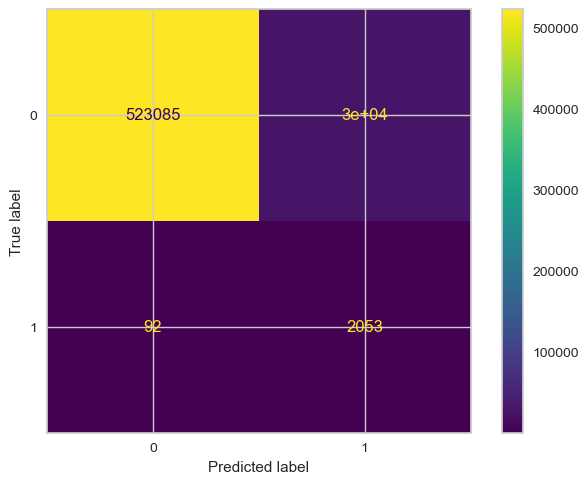

In [257]:
# plot Confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, hist_clf_y_pred)

In [258]:
# print classification report
print(metrics.classification_report(y_test, hist_clf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.06      0.96      0.12      2145

    accuracy                           0.94    555719
   macro avg       0.53      0.95      0.54    555719
weighted avg       1.00      0.94      0.97    555719



In [259]:
# get roc_auc score
hist_clf_roc_auc_score = metrics.roc_auc_score(y_test, hist_clf_y_pred)
print("HistGradientBoosting Roc_AUC Score Is {}".format(hist_clf_roc_auc_score))

HistGradientBoosting Roc_AUC Score Is 0.9510164548618305


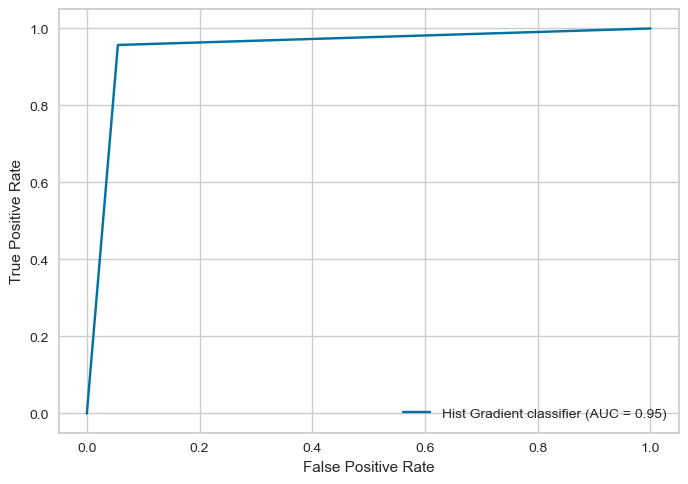

In [260]:
plot_roc_auc_curve(hist_clf_y_pred, "Hist Gradient classifier")

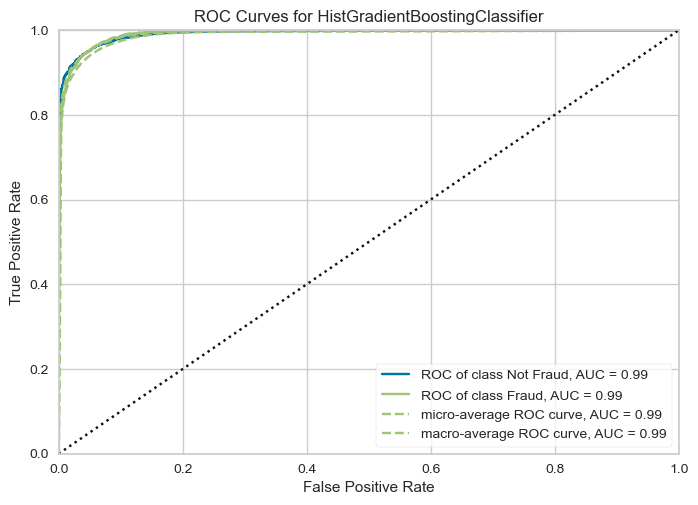

<AxesSubplot:title={'center':'ROC Curves for HistGradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [261]:
visualizer = ROCAUC(hist_clf, classes=["Not Fraud", "Fraud"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### Voting Classifier

In [262]:
# initializa model
vot_clf = VotingClassifier(estimators=[
    ("RandomForest", RandomForestClassifier()),
    ("XGBoost", XGBClassifier()),
    ("HistGradientBoosting", HistGradientBoostingClassifier())
])

In [263]:
# fit the model model
vot_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('RandomForest', RandomForestClassifier()),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('HistGradientBoosting',
                              HistGradientBoostingClassifier())])

In [264]:
# predict x test
vot_clf_y_pred = lgbm_clf.predict(X_test)

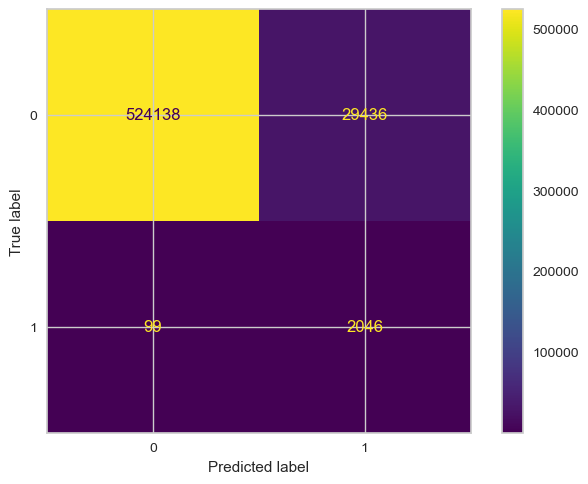

In [265]:
# plot Confusion Metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, vot_clf_y_pred)

In [266]:
# print classification report
print(metrics.classification_report(y_test, vot_clf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.95      0.12      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.95      0.55    555719
weighted avg       1.00      0.95      0.97    555719



In [267]:
# get roc_auc score
vot_clf_roc_auc_score = metrics.roc_auc_score(y_test, vot_clf_y_pred)
print("LGBMClassifier Roc_AUC Score Is {}".format(vot_clf_roc_auc_score))

LGBMClassifier Roc_AUC Score Is 0.9503358455863452


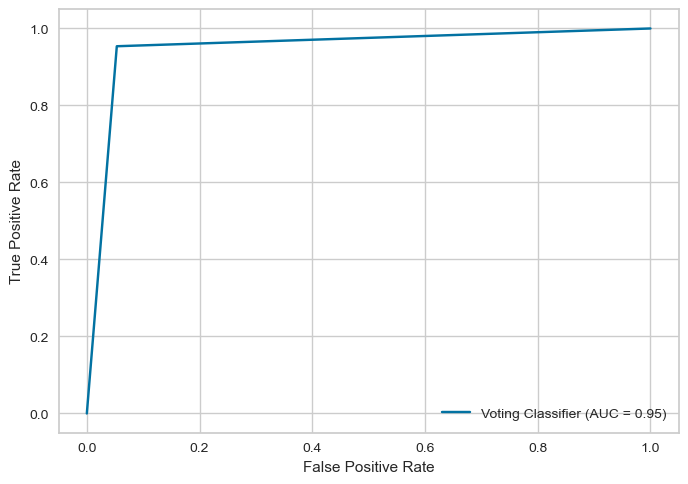

In [268]:
plot_roc_auc_curve(vot_clf_y_pred, "Voting Classifier")

### Compare Between Ensemble Models

In [269]:
# initialize Parameters
ensemble_models = [
    'RandomForest',
    'ExtraTrees',
    'XGBoost',
    'LGBM',
    'HistGradientBoostin',
    'Voting'
]
ensembe_models_roc_auc_score = [
    rf_clf_roc_auc_score,
    extra_trees_clf_roc_auc_score,
    xgb_clf_roc_auc_score,
    lgbm_clf_roc_auc_score,
    hist_clf_roc_auc_score,
    vot_clf_roc_auc_score
]

In [270]:
ensembe_models_roc_auc_score

[0.9479461557469195,
 0.923253938090437,
 0.9478337890833782,
 0.9503358455863452,
 0.9510164548618305,
 0.9503358455863452]

In [271]:
# Plot The Result Using Plotly
px.bar(x=ensemble_models, y=ensembe_models_roc_auc_score, color=ensemble_models, title="Ensemble Models").update_layout(
    xaxis_title="Models", 
    yaxis_title="Roc_Auc_Score"
)

Text(0, 0.5, 'Roc_Auc_Score')

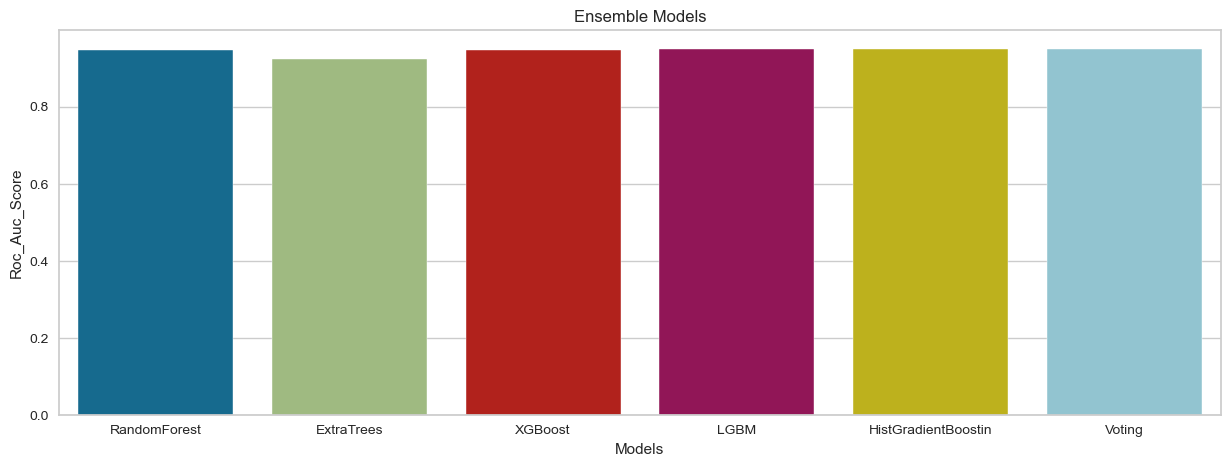

In [272]:
# plot using seaborn
plt.figure(figsize=(15, 5))
plt.title('Ensemble Models')
sns.barplot(x=ensemble_models, y=ensembe_models_roc_auc_score)
plt.xlabel("Models")
plt.ylabel("Roc_Auc_Score")

### Tune The best Model ['LGBM Classifier']

In [273]:
# Tune Learning Rate
lr_list = [0.1, 0.01, 0.001, 0.3, 0.03, 0.003, 0.9, 0.09, 0.009]
lr_list_str = ['0.1', '0.01', '0.001', '0.3', '0.03', '0.003', '0.9', '0.09', '0.009']
lr_roc_score = []
for i in tqdm(lr_list):
    model = LGBMClassifier(random_state=42, learning_rate=i)
    model.fit(X_train, y_train)
    model_y_pred = model.predict(X_test)
    lr_roc_score.append(metrics.roc_auc_score(y_test, model_y_pred))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:05<00:00,  1.51it/s]


In [274]:
lr_roc_score

[0.9503358455863452,
 0.9422983691236896,
 0.9374292450087195,
 0.9505494892890255,
 0.9507141628003519,
 0.9404976959932577,
 0.8831311110679362,
 0.9522982008591883,
 0.9413470695949642]

<AxesSubplot:>

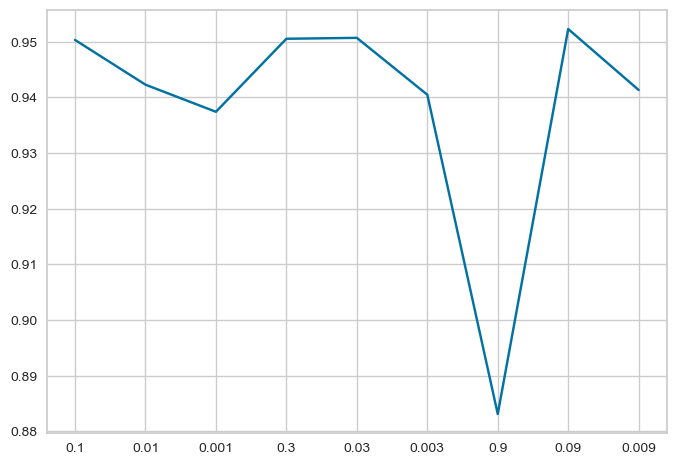

In [275]:
# plot The result
sns.lineplot(x=lr_list_str, y=lr_roc_score)

In [276]:
lr_roc_score[np.argmax(lr_roc_score)]

0.9522982008591883

### Ensemble Learning Conclusion
The Best Model Is LGBM Classifier with learning rate of '0.1' and The Roc_Auc Score is '0.9525143415801215'